* Data source: https://github.com/Jesperkemist/perovskitedatabase_data
* Description of the dataset fields: https://www.perovskitedatabase.com/Resources

In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

pd.set_option('max_column', 100)

### 데이터 로드

In [4]:
df = pd.read_csv('perovskitedatabase_data-main/data/Perovskite_database_content_all_data.csv')
df

C:\Users\donguk\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3418: DtypeWarning: Columns (10,29,31,32,35,36,40,44,45,46,48,51,54,65,84,89,90,93,98,99,100,105,108,115,118,122,123,125,130,134,138,142,143,144,146,149,152,163,166,167,171,172,173,175,178,181,192,194,225,271,272,273,277,315,321,335,336,342,348,371,373,374,376,380,384,387) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,Ref_ID,Ref_ID_temp,Ref_name_of_person_entering_the_data,Ref_data_entered_by_author,Ref_DOI_number,Ref_lead_author,Ref_publication_date,Ref_journal,Ref_part_of_initial_dataset,Ref_original_filename_data_upload,Ref_free_text_comment,Ref_internal_sample_id,Cell_stack_sequence,Cell_area_total,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_flexible_min_bending_radius,Cell_semitransparent,Cell_semitransparent_AVT,Cell_semitransparent_wavelength_range,Cell_semitransparent_raw_data,Module,Module_number_of_cells_in_module,Module_area_total,Module_area_effective,Module_JV_data_recalculated_per_cell,Substrate_stack_sequence,Substrate_thickness,Substrate_area,Substrate_supplier,Substrate_brand_name,Substrate_deposition_procedure,Substrate_surface_roughness_rms,Substrate_etching_procedure,Substrate_cleaning_procedure,ETL_stack_sequence,ETL_thickness,ETL_additives_compounds,ETL_additives_concentrations,ETL_deposition_procedure,ETL_deposition_aggregation_state_of_reactants,ETL_deposition_synthesis_atmosphere,ETL_deposition_synthesis_atmosphere_pressure_total,ETL_deposition_synthesis_atmosphere_pressure_partial,ETL_deposition_synthesis_atmosphere_relative_humidity,ETL_deposition_solvents,ETL_deposition_solvents_mixing_ratios,ETL_deposition_solvents_supplier,...,Stability_PCE_Ts80,Stability_PCE_Te80,Stability_PCE_Tse80,Stability_PCE_after_1000_h,Stability_lifetime_energy_yield,Stability_flexible_cell_number_of_bending_cycles,Stability_flexible_cell_bending_radius,Stability_flexible_cell_PCE_initial_value,Stability_flexible_cell_PCE_end_of_experiment,Stability_link_raw_data_for_stability_trace,Outdoor_tested,Outdoor_protocol,Outdoor_average_over_n_number_of_cells,Outdoor_location_country,Outdoor_location_city,Outdoor_location_coordinates,Outdoor_location_climate_zone,Outdoor_installation_tilt,Outdoor_installation_cardinal_direction,Outdoor_installation_number_of_solar_tracking_axis,Outdoor_time_season,Outdoor_time_start,Outdoor_time_end,Outdoor_time_total_exposure,Outdoor_potential_bias_load_condition,Outdoor_potential_bias_range,Outdoor_potential_bias_passive_resistance,Outdoor_temperature_load_condition,Outdoor_temperature_range,Outdoor_temperature_tmodule,Outdoor_periodic_JV_measurements,Outdoor_periodic_JV_measurements_time_between_measurements,Outdoor_PCE_initial_value,Outdoor_PCE_burn_in_observed,Outdoor_PCE_end_of_experiment,Outdoor_PCE_T95,Outdoor_PCE_Ts95,Outdoor_PCE_T80,Outdoor_PCE_Ts80,Outdoor_PCE_Te80,Outdoor_PCE_Tse80,Outdoor_PCE_after_1000_h,Outdoor_power_generated,Outdoor_link_raw_data_for_outdoor_trace,Outdoor_detaild_weather_data_available,Outdoor_link_detailed_weather_data,Outdoor_spectral_data_available,Outdoor_link_spectral_data,Outdoor_irradiance_measured,Outdoor_link_irradiance_data
0,1,1,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,NaN,NaN,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.20,0,nip,False,NaN,False,NaN,nan; nan,NaN,False,0,NaN,NaN,False,SLG | FTO,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,TiO2-c | TiO2-mp,65.0 | nan,Unknown,NaN,Spray-pyrolys | Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,NaN,1,NaN,NaN,nan; nan,NaN,NaN,NaN,0,NaN,0000:00:00:00:00,0000:00:00:00:00,NaN,NaN,nan; nan,NaN,NaN,nan; nan,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
1,2,2,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,NaN,NaN,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.20,0,nip,False,NaN,False,NaN,nan; nan,NaN,False,0,NaN,NaN,False,SLG | FTO,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,TiO2-c | TiO2-mp,65.0 | nan,Unknown,NaN,Spray-pyrolys | Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,...,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,False,NaN,1,NaN,NaN,nan; nan,NaN,NaN,NaN,0,NaN

In [5]:
df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42443 entries, 0 to 42442
Data columns (total 410 columns):
 #    Column                                                           Non-Null Count  Dtype  
---   ------                                                           --------------  -----  
 0    Ref_ID                                                           42443 non-null  int64  
 1    Ref_ID_temp                                                      42443 non-null  int64  
 2    Ref_name_of_person_entering_the_data                             42443 non-null  object 
 3    Ref_data_entered_by_author                                       42443 non-null  bool   
 4    Ref_DOI_number                                                   42443 non-null  object 
 5    Ref_lead_author                                                  42443 non-null  object 
 6    Ref_publication_date                                             42443 non-null  object 
 7    Ref_journal                  

* Reference Information -> 참고 정보
* Cell Definition, Module Definition, Substrate, Electron transport layer, Hole transport layer, Back contact, Additional layers -> 구조 관련. Cell & Module & Layer & ...
* The perovskite -> 메인 정보
* Encapsulation -> 캡슐화
* JV data -> ?
* Stabilised efficiency, Quantum efficiency, Stability -> 효율성 & 안정성
* Outdoor testing -> test 환경?

* Reference Information
 * 0    Ref_ID                                                           42443 non-null  int64  
 * 1    Ref_ID_temp                                                      42443 non-null  int64  
 * 2    Ref_name_of_person_entering_the_data                             42443 non-null  object 
 * 3    Ref_data_entered_by_author                                       42443 non-null  bool   
 * 4    Ref_DOI_number                                                   42443 non-null  object 
 * 5    Ref_lead_author                                                  42443 non-null  object 
 * 6    Ref_publication_date                                             42443 non-null  object 
 * 7    Ref_journal                                                      42443 non-null  object 
 * 8    Ref_part_of_initial_dataset                                      42443 non-null  bool   
 * 9    Ref_original_filename_data_upload                                42443 non-null  object 
 * 10   Ref_free_text_comment                                            1028 non-null   object 
 * 11   Ref_internal_sample_id                                           19507 non-null  object 
* Cell Definition
 * 12   Cell_stack_sequence                                              42443 non-null  object 
 * 13   Cell_area_total                                                  959 non-null    float64
 * 14   Cell_area_measured                                               41732 non-null  float64
 * 15   Cell_number_of_cells_per_substrate                               42443 non-null  int64  
 * 16   Cell_architecture                                                42443 non-null  object 
 * 17   Cell_flexible                                                    42443 non-null  bool   
 * 18   Cell_flexible_min_bending_radius                                 0 non-null      float64
 * 19   Cell_semitransparent                                             42443 non-null  bool   
 * 20   Cell_semitransparent_AVT                                         0 non-null      float64
 * 21   Cell_semitransparent_wavelength_range                            42443 non-null  object 
 * 22   Cell_semitransparent_raw_data                                    0 non-null      float64
* Module Definition
 * 23   Module                                                           42443 non-null  bool   
 * 24   Module_number_of_cells_in_module                                 42443 non-null  int64  
 * 25   Module_area_total                                                290 non-null    float64
 * 26   Module_area_effective                                            89 non-null     float64
 * 27   Module_JV_data_recalculated_per_cell                             42443 non-null  bool   
* Substrate
 * 28   Substrate_stack_sequence                                         42443 non-null  object 
 * 29   Substrate_thickness                                              346 non-null    object 
 * 30   Substrate_area                                                   318 non-null    float64
 * 31   Substrate_supplier                                               693 non-null    object 
 * 32   Substrate_brand_name                                             529 non-null    object 
 * 33   Substrate_deposition_procedure                                   42443 non-null  object 
 * 34   Substrate_surface_roughness_rms                                  0 non-null      float64
 * 35   Substrate_etching_procedure                                      629 non-null    object 
 * 36   Substrate_cleaning_procedure                                     1203 non-null   object 
* Electron transport layer
 * 37   ETL_stack_sequence                                               42443 non-null  object 
 * 38   ETL_thickness                                                    18506 non-null  object 
 * 39   ETL_additives_compounds                                          39154 non-null  object 
 * 40   ETL_additives_concentrations                                     309 non-null    object 
 * 41   ETL_deposition_procedure                                         42443 non-null  object 
 * 42   ETL_deposition_aggregation_state_of_reactants                    42443 non-null  object 
 * 43   ETL_deposition_synthesis_atmosphere                              42443 non-null  object 
 * 44   ETL_deposition_synthesis_atmosphere_pressure_total               385 non-null    object 
 * 45   ETL_deposition_synthesis_atmosphere_pressure_partial             295 non-null    object 
 * 46   ETL_deposition_synthesis_atmosphere_relative_humidity            275 non-null    object 
 * 47   ETL_deposition_solvents                                          42443 non-null  object 
 * 48   ETL_deposition_solvents_mixing_ratios                            953 non-null    object 
 * 49   ETL_deposition_solvents_supplier                                 42443 non-null  object 
 * 50   ETL_deposition_solvents_purity                                   42443 non-null  object 
 * 51   ETL_deposition_reaction_solutions_compounds                      1548 non-null   object 
 * 52   ETL_deposition_reaction_solutions_compounds_supplier             42443 non-null  object 
 * 53   ETL_deposition_reaction_solutions_compounds_purity               42443 non-null  object 
 * 54   ETL_deposition_reaction_solutions_concentrations                 1227 non-null   object 
 * 55   ETL_deposition_reaction_solutions_volumes                        42443 non-null  object 
 * 56   ETL_deposition_reaction_solutions_age                            42443 non-null  object 
 * 57   ETL_deposition_reaction_solutions_temperature                    42443 non-null  object 
 * 58   ETL_deposition_substrate_temperature                             42443 non-null  object 
 * 59   ETL_deposition_thermal_annealing_temperature                     42443 non-null  object 
 * 60   ETL_deposition_thermal_annealing_time                            42443 non-null  object 
 * 61   ETL_deposition_thermal_annealing_atmosphere                      42443 non-null  object 
 * 62   ETL_storage_time_until_next_deposition_step                      22 non-null     float64
 * 63   ETL_storage_atmosphere                                           42443 non-null  object 
 * 64   ETL_storage_relative_humidity                                    17 non-null     float64
 * 65   ETL_surface_treatment_before_next_deposition_step                167 non-null    object 
* The perovskite
 * 66   Perovskite_single_crystal                                        42443 non-null  bool   
 * 67   Perovskite_dimension_0D                                          42443 non-null  bool   
 * 68   Perovskite_dimension_2D                                          42443 non-null  bool   
 * 69   Perovskite_dimension_2D3D_mixture                                42443 non-null  bool   
 * 70   Perovskite_dimension_3D                                          42443 non-null  bool   
 * 71   Perovskite_dimension_3D_with_2D_capping_layer                    42443 non-null  bool   
 * 72   Perovskite_dimension_list_of_layers                              42424 non-null  object 
 * 73   Perovskite_composition_perovskite_ABC3_structure                 42443 non-null  bool   
 * 74   Perovskite_composition_perovskite_inspired_structure             42443 non-null  bool   
 * 75   Perovskite_composition_a_ions                                    42414 non-null  object 
 * 76   Perovskite_composition_a_ions_coefficients                       42386 non-null  object 
 * 77   Perovskite_composition_b_ions                                    42438 non-null  object 
 * 78   Perovskite_composition_b_ions_coefficients                       42409 non-null  object 
 * 79   Perovskite_composition_c_ions                                    42438 non-null  object 
 * 80   Perovskite_composition_c_ions_coefficients                       42404 non-null  object 
 * 81   Perovskite_composition_none_stoichiometry_components_in_excess   6930 non-null   object 
 * 82   Perovskite_composition_short_form                                42443 non-null  object 
 * 83   Perovskite_composition_long_form                                 42443 non-null  object 
 * 84   Perovskite_composition_assumption                                1469 non-null   object 
 * 85   Perovskite_composition_inorganic                                 42443 non-null  bool   
 * 86   Perovskite_composition_leadfree                                  42443 non-null  bool   
 * 87   Perovskite_additives_compounds                                   13771 non-null  object 
 * 88   Perovskite_additives_concentrations                              4896 non-null   object 
 * 89   Perovskite_thickness                                             13317 non-null  object 
 * 90   Perovskite_band_gap                                              31867 non-null  object 
 * 91   Perovskite_band_gap_graded                                       42443 non-null  bool   
 * 92   Perovskite_band_gap_estimation_basis                             23144 non-null  object 
 * 93   Perovskite_pl_max                                                10205 non-null  object 
 * 94   Perovskite_deposition_number_of_deposition_steps                 42443 non-null  int64  
 * 95   Perovskite_deposition_procedure                                  42443 non-null  object 
 * 96   Perovskite_deposition_aggregation_state_of_reactants             42443 non-null  object 
 * 97   Perovskite_deposition_synthesis_atmosphere                       42443 non-null  object 
 * 98   Perovskite_deposition_synthesis_atmosphere_pressure_total        566 non-null    object 
 * 99   Perovskite_deposition_synthesis_atmosphere_pressure_partial      548 non-null    object 
 * 100  Perovskite_deposition_synthesis_atmosphere_relative_humidity     684 non-null    object 
 * 101  Perovskite_deposition_solvents                                   42443 non-null  object 
 * 102  Perovskite_deposition_solvents_mixing_ratios                     40321 non-null  object 
 * 103  Perovskite_deposition_solvents_supplier                          42443 non-null  object 
 * 104  Perovskite_deposition_solvents_purity                            42443 non-null  object 
 * 105  Perovskite_deposition_reaction_solutions_compounds               1768 non-null   object 
 * 106  Perovskite_deposition_reaction_solutions_compounds_supplier      42443 non-null  object 
 * 107  Perovskite_deposition_reaction_solutions_compounds_purity        42443 non-null  object 
 * 108  Perovskite_deposition_reaction_solutions_concentrations          1455 non-null   object 
 * 109  Perovskite_deposition_reaction_solutions_volumes                 42443 non-null  object 
 * 110  Perovskite_deposition_reaction_solutions_age                     42443 non-null  object 
 * 111  Perovskite_deposition_reaction_solutions_temperature             42443 non-null  object 
 * 112  Perovskite_deposition_substrate_temperature                      42440 non-null  object 
 * 113  Perovskite_deposition_quenching_induced_crystallisation          42443 non-null  bool   
 * 114  Perovskite_deposition_quenching_media                            42443 non-null  object 
 * 115  Perovskite_deposition_quenching_media_mixing_ratios              716 non-null    object 
 * 116  Perovskite_deposition_quenching_media_volume                     42443 non-null  object 
 * 117  Perovskite_deposition_quenching_media_additives_compounds        835 non-null    object 
 * 118  Perovskite_deposition_quenching_media_additives_concentrations   85 non-null     object 
 * 119  Perovskite_deposition_thermal_annealing_temperature              42443 non-null  object 
 * 120  Perovskite_deposition_thermal_annealing_time                     42443 non-null  object 
 * 121  Perovskite_deposition_thermal_annealing_atmosphere               42443 non-null  object 
 * 122  Perovskite_deposition_thermal_annealing_relative_humidity        151 non-null    object 
 * 123  Perovskite_deposition_thermal_annealing_pressure                 259 non-null    object 
 * 124  Perovskite_deposition_solvent_annealing                          42443 non-null  bool   
 * 125  Perovskite_deposition_solvent_annealing_timing                   128 non-null    object 
 * 126  Perovskite_deposition_solvent_annealing_solvent_atmosphere       42443 non-null  object 
 * 127  Perovskite_deposition_solvent_annealing_time                     42443 non-null  object 
 * 128  Perovskite_deposition_solvent_annealing_temperature              42443 non-null  object 
 * 129  Perovskite_deposition_after_treatment_of_formed_perovskite       1624 non-null   object 
 * 130  Perovskite_deposition_after_treatment_of_formed_perovskite_met   120 non-null    object 
 * 131  Perovskite_storage_time_until_next_deposition_step               42443 non-null  object 
 * 132  Perovskite_storage_atmosphere                                    42443 non-null  object 
 * 133  Perovskite_storage_relative_humidity                             67 non-null     float64
 * 134  Perovskite_surface_treatment_before_next_deposition_step         4 non-null      object 
* Hole transport layer
 * 135  HTL_stack_sequence                                               42443 non-null  object 
 * 136  HTL_thickness_list                                               10016 non-null  object 
 * 137  HTL_additives_compounds                                          24086 non-null  object 
 * 138  HTL_additives_concentrations                                     993 non-null    object 
 * 139  HTL_deposition_procedure                                         42443 non-null  object 
 * 140  HTL_deposition_aggregation_state_of_reactants                    42443 non-null  object 
 * 141  HTL_deposition_synthesis_atmosphere                              42443 non-null  object 
 * 142  HTL_deposition_synthesis_atmosphere_pressure_total               486 non-null    object 
 * 143  HTL_deposition_synthesis_atmosphere_pressure_partial             438 non-null    object 
 * 144  HTL_deposition_synthesis_atmosphere_relative_humidity            139 non-null    object 
 * 145  HTL_deposition_solvents                                          42443 non-null  object 
 * 146  HTL_deposition_solvents_mixing_ratios                            509 non-null    object 
 * 147  HTL_deposition_solvents_supplier                                 42443 non-null  object 
 * 148  HTL_deposition_solvents_purity                                   42443 non-null  object 
 * 149  HTL_deposition_reaction_solutions_compounds                      1385 non-null   object 
 * 150  HTL_deposition_reaction_solutions_compounds_supplier             42443 non-null  object 
 * 151  HTL_deposition_reaction_solutions_compounds_purity               42443 non-null  object 
 * 152  HTL_deposition_reaction_solutions_concentrations                 1178 non-null   object 
 * 153  HTL_deposition_reaction_solutions_volumes                        42443 non-null  object 
 * 154  HTL_deposition_reaction_solutions_age                            42443 non-null  object 
 * 155  HTL_deposition_reaction_solutions_temperature                    42443 non-null  object 
 * 156  HTL_deposition_substrate_temperature                             42440 non-null  object 
 * 157  HTL_deposition_thermal_annealing_temperature                     42443 non-null  object 
 * 158  HTL_deposition_thermal_annealing_time                            42443 non-null  object 
 * 159  HTL_deposition_thermal_annealing_atmosphere                      42443 non-null  object 
 * 160  HTL_storage_time_until_next_deposition_step                      42443 non-null  object 
 * 161  HTL_storage_atmosphere                                           42443 non-null  object 
 * 162  HTL_storage_relative_humidity                                    8 non-null      float64
 * 163  HTL_surface_treatment_before_next_deposition_step                47 non-null     object 
* Back contact
 * 164  Backcontact_stack_sequence                                       42443 non-null  object 
 * 165  Backcontact_thickness_list                                       34469 non-null  object 
 * 166  Backcontact_additives_compounds                                  1388 non-null   object 
 * 167  Backcontact_additives_concentrations                             16 non-null     object 
 * 168  Backcontact_deposition_procedure                                 42443 non-null  object 
 * 169  Backcontact_deposition_aggregation_state_of_reactants            42443 non-null  object 
 * 170  Backcontact_deposition_synthesis_atmosphere                      42443 non-null  object 
 * 171  Backcontact_deposition_synthesis_atmosphere_pressure_total       458 non-null    object 
 * 172  Backcontact_deposition_synthesis_atmosphere_pressure_partial     174 non-null    object 
 * 173  Backcontact_deposition_synthesis_atmosphere_relative_humidity    37 non-null     object 
 * 174  Backcontact_deposition_solvents                                  42443 non-null  object 
 * 175  Backcontact_deposition_solvents_mixing_ratios                    182 non-null    object 
 * 176  Backcontact_deposition_solvents_supplier                         42443 non-null  object 
 * 177  Backcontact_deposition_solvents_purity                           42443 non-null  object 
 * 178  Backcontact_deposition_reaction_solutions_compounds              1053 non-null   object 
 * 179  Backcontact_deposition_reaction_solutions_compounds_supplier     42443 non-null  object 
 * 180  Backcontact_deposition_reaction_solutions_compounds_purity       42443 non-null  object 
 * 181  Backcontact_deposition_reaction_solutions_concentrations         7 non-null      object 
 * 182  Backcontact_deposition_reaction_solutions_volumes                42443 non-null  object 
 * 183  Backcontact_deposition_reaction_solutions_age                    42443 non-null  object 
 * 184  Backcontact_deposition_reaction_solutions_temperature            42443 non-null  object 
 * 185  Backcontact_deposition_substrate_temperature                     42443 non-null  object 
 * 186  Backcontact_deposition_thermal_annealing_temperature             42440 non-null  object 
 * 187  Backcontact_deposition_thermal_annealing_time                    42443 non-null  object 
 * 188  Backcontact_deposition_thermal_annealing_atmosphere              42443 non-null  object 
 * 189  Backcontact_storage_time_until_next_deposition_step              42443 non-null  object 
 * 190  Backcontact_storage_atmosphere                                   42443 non-null  object 
 * 191  Backcontact_storage_relative_humidity                            11 non-null     float64
 * 192  Backcontact_surface_treatment_before_next_deposition_step        4 non-null      object 
* Additional layers
 * 193  Add_lay_front                                                    42443 non-null  bool   
 * 194  Add_lay_front_function                                           116 non-null    object 
 * 195  Add_lay_front_stack_sequence                                     42443 non-null  object 
 * 196  Add_lay_front_thickness_list                                     8 non-null      float64
 * 197  Add_lay_front_additives_compounds                                0 non-null      float64
 * 198  Add_lay_front_additives_concentrations                           0 non-null      float64
 * 199  Add_lay_front_deposition_procedure                               42443 non-null  object 
 * 200  Add_lay_front_deposition_aggregation_state_of_reactants          42443 non-null  object 
 * 201  Add_lay_front_deposition_synthesis_atmosphere                    42443 non-null  object 
 * 202  Add_lay_front_deposition_synthesis_atmosphere_pressure_total     0 non-null      float64
 * 203  Add_lay_front_deposition_synthesis_atmosphere_pressure_partial   0 non-null      float64
 * 204  Add_lay_front_deposition_synthesis_atmosphere_relative_humidity  0 non-null      float64
 * 205  Add_lay_front_deposition_solvents                                42443 non-null  object 
 * 206  Add_lay_front_deposition_solvents_mixing_ratios                  0 non-null      float64
 * 207  Add_lay_front_deposition_solvents_supplier                       42443 non-null  object 
 * 208  Add_lay_front_deposition_solvents_purity                         42443 non-null  object 
 * 209  Add_lay_front_deposition_reaction_solutions_compounds            0 non-null      float64
 * 210  Add_lay_front_deposition_reaction_solutions_compounds_supplier   42443 non-null  object 
 * 211  Add_lay_front_deposition_reaction_solutions_compounds_purity     42443 non-null  object 
 * 212  Add_lay_front_deposition_reaction_solutions_concentrations       0 non-null      float64
 * 213  Add_lay_front_deposition_reaction_solutions_volumes              42443 non-null  object 
 * 214  Add_lay_front_deposition_reaction_solutions_age                  42443 non-null  object 
 * 215  Add_lay_front_deposition_reaction_solutions_temperature          42443 non-null  object 
 * 216  Add_lay_front_deposition_substrate_temperature                   42443 non-null  object 
 * 217  Add_lay_front_deposition_thermal_annealing_temperature           42443 non-null  object 
 * 218  Add_lay_front_deposition_thermal_annealing_time                  42443 non-null  object 
 * 219  Add_lay_front_deposition_thermal_annealing_atmosphere            42443 non-null  object 
 * 220  Add_lay_front_storage_time_until_next_deposition_step            42443 non-null  object 
 * 221  Add_lay_front_storage_atmosphere                                 42443 non-null  object 
 * 222  Add_lay_front_storage_relative_humidity                          0 non-null      float64
 * 223  Add_lay_front_surface_treatment_before_next_deposition_step      0 non-null      float64
 * 224  Add_lay_back                                                     42443 non-null  bool   
 * 225  Add_lay_back_function                                            28 non-null     object 
 * 226  Add_lay_back_stack_sequence                                      42443 non-null  object 
 * 227  Add_lay_back_thickness_list                                      4 non-null      float64
 * 228  Add_lay_back_additives_compounds                                 0 non-null      float64
 * 229  Add_lay_back_additives_concentrations                            0 non-null      float64
 * 230  Add_lay_back_deposition_procedure                                42443 non-null  object 
 * 231  Add_lay_back_deposition_aggregation_state_of_reactants           42443 non-null  object 
 * 232  Add_lay_back_deposition_synthesis_atmosphere                     42443 non-null  object 
 * 233  Add_lay_back_deposition_synthesis_atmosphere_pressure_total      0 non-null      float64
 * 234  Add_lay_back_deposition_synthesis_atmosphere_pressure_partial    0 non-null      float64
 * 235  Add_lay_back_deposition_synthesis_atmosphere_relative_humidity   0 non-null      float64
 * 236  Add_lay_back_deposition_solvents                                 42443 non-null  object 
 * 237  Add_lay_back_deposition_solvents_mixing_ratios                   0 non-null      float64
 * 238  Add_lay_back_deposition_solvents_supplier                        42443 non-null  object 
 * 239  Add_lay_back_deposition_solvents_purity                          42443 non-null  object 
 * 240  Add_lay_back_deposition_reaction_solutions_compounds             0 non-null      float64
 * 241  Add_lay_back_deposition_reaction_solutions_compounds_supplier    42443 non-null  object 
 * 242  Add_lay_back_deposition_reaction_solutions_compounds_purity      42443 non-null  object 
 * 243  Add_lay_back_deposition_reaction_solutions_concentrations        0 non-null      float64
 * 244  Add_lay_back_deposition_reaction_solutions_volumes               42443 non-null  object 
 * 245  Add_lay_back_deposition_reaction_solutions_age                   42443 non-null  object 
 * 246  Add_lay_back_deposition_reaction_solutions_temperature           42443 non-null  object 
 * 247  Add_lay_back_deposition_substrate_temperature                    42443 non-null  object 
 * 248  Add_lay_back_deposition_thermal_annealing_temperature            42443 non-null  object 
 * 249  Add_lay_back_deposition_thermal_annealing_time                   42443 non-null  object 
 * 250  Add_lay_back_deposition_thermal_annealing_atmosphere             42443 non-null  object 
 * 251  Add_lay_back_storage_time_until_next_deposition_step             42443 non-null  object 
 * 252  Add_lay_back_storage_atmosphere                                  42443 non-null  object 
 * 253  Add_lay_back_storage_relative_humidity                           0 non-null      float64
 * 254  Add_lay_back_surface_treatment_before_next_deposition_step       0 non-null      float64
* Encapsulation
 * 255  Encapsulation                                                    42443 non-null  bool   
 * 256  Encapsulation_stack_sequence                                     42443 non-null  object 
 * 257  Encapsulation_edge_sealing_materials                             42443 non-null  object 
 * 258  Encapsulation_atmosphere_for_encapsulation                       42443 non-null  object 
 * 259  Encapsulation_water_vapour_transmission_rate                     16 non-null     float64
 * 260  Encapsulation_oxygen_transmission_rate                           2 non-null      float64
* JV data
 * 261  JV_measured                                                      42443 non-null  bool   
 * 262  JV_average_over_n_number_of_cells                                42443 non-null  int64  
 * 263  JV_certified_values                                              42443 non-null  bool   
 * 264  JV_certification_institute                                       94 non-null     object 
 * 265  JV_storage_age_of_cell                                           42443 non-null  object 
 * 266  JV_storage_atmosphere                                            42443 non-null  object 
 * 267  JV_storage_relative_humidity                                     16 non-null     float64
 * 268  JV_test_atmosphere                                               42443 non-null  object 
 * 269  JV_test_relative_humidity                                        289 non-null    float64
 * 270  JV_test_temperature                                              155 non-null    float64
 * 271  JV_light_source_type                                             1800 non-null   object 
 * 272  JV_light_source_brand_name                                       969 non-null    object 
 * 273  JV_light_source_simulator_class                                  572 non-null    object 
 * 274  JV_light_intensity                                               42380 non-null  float64
 * 275  JV_light_spectra                                                 39954 non-null  object 
 * 276  JV_light_wavelength_range                                        42443 non-null  object 
 * 277  JV_light_illumination_direction                                  1144 non-null   object 
 * 278  JV_light_masked_cell                                             42443 non-null  bool   
 * 279  JV_light_mask_area                                               814 non-null    float64
 * 280  JV_scan_speed                                                    16083 non-null  float64
 * 281  JV_scan_delay_time                                               127 non-null    float64
 * 282  JV_scan_integration_time                                         20 non-null     float64
 * 283  JV_scan_voltage_step                                             175 non-null    float64
 * 284  JV_preconditioning_protocol                                      1000 non-null   object 
 * 285  JV_preconditioning_time                                          218 non-null    float64
 * 286  JV_preconditioning_potential                                     135 non-null    float64
 * 287  JV_preconditioning_light_intensity                               62 non-null     float64
 * 288  JV_reverse_scan_Voc                                              39626 non-null  float64
 * 289  JV_reverse_scan_Jsc                                              39658 non-null  float64
 * 290  JV_reverse_scan_FF                                               39479 non-null  float64
 * 291  JV_reverse_scan_PCE                                              40767 non-null  float64
 * 292  JV_reverse_scan_Vmp                                              126 non-null    float64
 * 293  JV_reverse_scan_Jmp                                              127 non-null    float64
 * 294  JV_reverse_scan_series_resistance                                67 non-null     float64
 * 295  JV_reverse_scan_shunt_resistance                                 51 non-null     float64
 * 296  JV_forward_scan_Voc                                              8643 non-null   float64
 * 297  JV_forward_scan_Jsc                                              8660 non-null   float64
 * 298  JV_forward_scan_FF                                               8610 non-null   float64
 * 299  JV_forward_scan_PCE                                              8789 non-null   float64
 * 300  JV_forward_scan_Vmp                                              49 non-null     float64
 * 301  JV_forward_scan_Jmp                                              49 non-null     float64
 * 302  JV_forward_scan_series_resistance                                49 non-null     float64
 * 303  JV_forward_scan_shunt_resistance                                 48 non-null     float64
 * 304  JV_link_raw_data                                                 0 non-null      float64
 * 305  JV_default_Voc                                                   40309 non-null  float64
 * 306  JV_default_Jsc                                                   40344 non-null  float64
 * 307  JV_default_FF                                                    40157 non-null  float64
 * 308  JV_default_PCE                                                   41519 non-null  float64
 * 309  JV_default_Voc_scan_direction                                    40309 non-null  object 
 * 310  JV_default_Jsc_scan_direction                                    40344 non-null  object 
 * 311  JV_default_FF_scan_direction                                     40157 non-null  object 
 * 312  JV_default_PCE_scan_direction                                    41519 non-null  object 
 * 313  JV_hysteresis_index                                              7877 non-null   float64
* Stabilised efficiency
 * 314  Stabilised_performance_measured                                  42443 non-null  bool   
 * 315  Stabilised_performance_procedure                                 241 non-null    object 
 * 316  Stabilised_performance_procedure_metrics                         99 non-null     float64
 * 317  Stabilised_performance_measurement_time                          233 non-null    float64
 * 318  Stabilised_performance_PCE                                       3385 non-null   float64
 * 319  Stabilised_performance_Vmp                                       175 non-null    float64
 * 320  Stabilised_performance_Jmp                                       179 non-null    float64
 * 321  Stabilised_performance_link_raw_data                             1 non-null      object 
* Quantum efficiency
 * 322  EQE_measured                                                     42443 non-null  bool   
 * 323  EQE_light_bias                                                   11 non-null     float64
 * 324  EQE_integrated_Jsc                                               5565 non-null   float64
 * 325  EQE_link_raw_data                                                0 non-null      float64
* Stability
 * 326  Stability_measured                                               42443 non-null  bool   
 * 327  Stability_protocol                                               7419 non-null   object 
 * 328  Stability_average_over_n_number_of_cells                         42443 non-null  int64  
 * 329  Stability_light_source_type                                      7378 non-null   object 
 * 330  Stability_light_source_brand_name                                0 non-null      float64
 * 331  Stability_light_source_simulator_class                           0 non-null      float64
 * 332  Stability_light_intensity                                        7296 non-null   float64
 * 333  Stability_light_spectra                                          676 non-null    object 
 * 334  Stability_light_wavelength_range                                 42443 non-null  object 
 * 335  Stability_light_illumination_direction                           10 non-null     object 
 * 336  Stability_light_load_condition                                   118 non-null    object 
 * 337  Stability_light_cycling_times                                    42443 non-null  object 
 * 338  Stability_light_UV_filter                                        42443 non-null  bool   
 * 339  Stability_potential_bias_load_condition                          7422 non-null   object 
 * 340  Stability_potential_bias_range                                   42443 non-null  object 
 * 341  Stability_potential_bias_passive_resistance                      13 non-null     float64
 * 342  Stability_temperature_load_condition                             369 non-null    object 
 * 343  Stability_temperature_range                                      42443 non-null  object 
 * 344  Stability_temperature_cycling_times                              42443 non-null  object 
 * 345  Stability_temperature_ramp_speed                                 0 non-null      float64
 * 346  Stability_atmosphere                                             42443 non-null  object 
 * 347  Stability_atmosphere_oxygen_concentration                        15 non-null     float64
 * 348  Stability_relative_humidity_load_conditions                      249 non-null    object 
 * 349  Stability_relative_humidity_range                                42443 non-null  object 
 * 350  Stability_relative_humidity_average_value                        5384 non-null   float64
 * 351  Stability_time_total_exposure                                    7399 non-null   float64
 * 352  Stability_periodic_JV_measurements                               42443 non-null  bool   
 * 353  Stability_periodic_JV_measurements_time_between_jv               42443 non-null  object 
 * 354  Stability_PCE_initial_value                                      3036 non-null   float64
 * 355  Stability_PCE_burn_in_observed                                   42443 non-null  bool   
 * 356  Stability_PCE_end_of_experiment                                  7373 non-null   float64
 * 357  Stability_PCE_T95                                                223 non-null    float64
 * 358  Stability_PCE_Ts95                                               22 non-null     float64
 * 359  Stability_PCE_T80                                                1834 non-null   float64
 * 360  Stability_PCE_Ts80                                               87 non-null     float64
 * 361  Stability_PCE_Te80                                               49 non-null     float64
 * 362  Stability_PCE_Tse80                                              6 non-null      float64
 * 363  Stability_PCE_after_1000_h                                       1008 non-null   float64
 * 364  Stability_lifetime_energy_yield                                  0 non-null      float64
 * 365  Stability_flexible_cell_number_of_bending_cycles                 42443 non-null  int64  
 * 366  Stability_flexible_cell_bending_radius                           2 non-null      float64
 * 367  Stability_flexible_cell_PCE_initial_value                        15 non-null     float64
 * 368  Stability_flexible_cell_PCE_end_of_experiment                    20 non-null     float64
 * 369  Stability_link_raw_data_for_stability_trace                      0 non-null      float64
* Outdoor testing
 * 370  Outdoor_tested                                                   42443 non-null  bool   
 * 371  Outdoor_protocol                                                 9 non-null      object 
 * 372  Outdoor_average_over_n_number_of_cells                           42443 non-null  int64  
 * 373  Outdoor_location_country                                         28 non-null     object 
 * 374  Outdoor_location_city                                            2 non-null      object 
 * 375  Outdoor_location_coordinates                                     42443 non-null  object 
 * 376  Outdoor_location_climate_zone                                    10 non-null     object 
 * 377  Outdoor_installation_tilt                                        9 non-null      float64
 * 378  Outdoor_installation_cardinal_direction                          1 non-null      float64
 * 379  Outdoor_installation_number_of_solar_tracking_axis               42443 non-null  int64  
 * 380  Outdoor_time_season                                              10 non-null     object 
 * 381  Outdoor_time_start                                               42443 non-null  object 
 * 382  Outdoor_time_end                                                 42443 non-null  object 
 * 383  Outdoor_time_total_exposure                                      39 non-null     float64
 * 384  Outdoor_potential_bias_load_condition                            1 non-null      object 
 * 385  Outdoor_potential_bias_range                                     42443 non-null  object 
 * 386  Outdoor_potential_bias_passive_resistance                        0 non-null      float64
 * 387  Outdoor_temperature_load_condition                               1 non-null      object 
 * 388  Outdoor_temperature_range                                        42443 non-null  object 
 * 389  Outdoor_temperature_tmodule                                      4 non-null      float64
 * 390  Outdoor_periodic_JV_measurements                                 42443 non-null  bool   
 * 391  Outdoor_periodic_JV_measurements_time_between_measurements       0 non-null      float64
 * 392  Outdoor_PCE_initial_value                                        19 non-null     float64
 * 393  Outdoor_PCE_burn_in_observed                                     42443 non-null  bool   
 * 394  Outdoor_PCE_end_of_experiment                                    38 non-null     float64
 * 395  Outdoor_PCE_T95                                                  1 non-null      float64
 * 396  Outdoor_PCE_Ts95                                                 1 non-null      float64
 * 397  Outdoor_PCE_T80                                                  2 non-null      float64
 * 398  Outdoor_PCE_Ts80                                                 0 non-null      float64
 * 399  Outdoor_PCE_Te80                                                 0 non-null      float64
 * 400  Outdoor_PCE_Tse80                                                0 non-null      float64
 * 401  Outdoor_PCE_after_1000_h                                         1 non-null      float64
 * 402  Outdoor_power_generated                                          1 non-null      float64
 * 403  Outdoor_link_raw_data_for_outdoor_trace                          0 non-null      float64
 * 404  Outdoor_detaild_weather_data_available                           42443 non-null  bool   
 * 405  Outdoor_link_detailed_weather_data                               0 non-null      float64
 * 406  Outdoor_spectral_data_available                                  42443 non-null  bool   
 * 407  Outdoor_link_spectral_data                                       0 non-null      float64
 * 408  Outdoor_irradiance_measured                                      42443 non-null  bool   
 * 409  Outdoor_link_irradiance_data                                     0 non-null      float64

In [6]:
# Reference Information
df.iloc[:5, :12]

,Ref_ID,Ref_ID_temp,Ref_name_of_person_entering_the_data,Ref_data_entered_by_author,Ref_DOI_number,Ref_lead_author,Ref_publication_date,Ref_journal,Ref_part_of_initial_dataset,Ref_original_filename_data_upload,Ref_free_text_comment,Ref_internal_sample_id
0,1,1,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,NaN,NaN
1,2,2,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,NaN,NaN
2,3,3,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,NaN,NaN
3,4,4,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,NaN,NaN
4,5,5,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,NaN,NaN


In [7]:
# Cell Definition
df.iloc[:5, 12:23]

,Cell_stack_sequence,Cell_area_total,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_flexible_min_bending_radius,Cell_semitransparent,Cell_semitransparent_AVT,Cell_semitransparent_wavelength_range,Cell_semitransparent_raw_data
0,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.2,0,nip,False,NaN,False,NaN,nan; nan,NaN
1,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.2,0,nip,False,NaN,False,NaN,nan; nan,NaN
2,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.2,0,nip,False,NaN,False,NaN,nan; nan,NaN
3,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.2,0,nip,False,NaN,False,NaN,nan; nan,NaN
4,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,NaN,0.2,0,nip,False,NaN,False,NaN,nan; nan,NaN


In [8]:
# Module Definition
df.iloc[:5, 23:28]

,Module,Module_number_of_cells_in_module,Module_area_total,Module_area_effective,Module_JV_data_recalculated_per_cell
0,False,0,NaN,NaN,False
1,False,0,NaN,NaN,False
2,False,0,NaN,NaN,False
3,False,0,NaN,NaN,False
4,False,0,NaN,NaN,False


In [9]:
# Substrate
df.iloc[:5, 28:37]

,Substrate_stack_sequence,Substrate_thickness,Substrate_area,Substrate_supplier,Substrate_brand_name,Substrate_deposition_procedure,Substrate_surface_roughness_rms,Substrate_etching_procedure,Substrate_cleaning_procedure
0,SLG | FTO,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN
1,SLG | FTO,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN
2,SLG | FTO,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN
3,SLG | FTO,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN
4,SLG | FTO,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN


In [10]:
# Electron transport layer
df.iloc[:5, 37:66]

,ETL_stack_sequence,ETL_thickness,ETL_additives_compounds,ETL_additives_concentrations,ETL_deposition_procedure,ETL_deposition_aggregation_state_of_reactants,ETL_deposition_synthesis_atmosphere,ETL_deposition_synthesis_atmosphere_pressure_total,ETL_deposition_synthesis_atmosphere_pressure_partial,ETL_deposition_synthesis_atmosphere_relative_humidity,ETL_deposition_solvents,ETL_deposition_solvents_mixing_ratios,ETL_deposition_solvents_supplier,ETL_deposition_solvents_purity,ETL_deposition_reaction_solutions_compounds,ETL_deposition_reaction_solutions_compounds_supplier,ETL_deposition_reaction_solutions_compounds_purity,ETL_deposition_reaction_solutions_concentrations,ETL_deposition_reaction_solutions_volumes,ETL_deposition_reaction_solutions_age,ETL_deposition_reaction_solutions_temperature,ETL_deposition_substrate_temperature,ETL_deposition_thermal_annealing_temperature,ETL_deposition_thermal_annealing_time,ETL_deposition_thermal_annealing_atmosphere,ETL_storage_time_until_next_deposition_step,ETL_storage_atmosphere,ETL_storage_relative_humidity,ETL_surface_treatment_before_next_deposition_step
0,TiO2-c | TiO2-mp,65.0 | nan,Unknown,NaN,Spray-pyrolys | Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN,NaN
1,TiO2-c | TiO2-mp,65.0 | nan,Unknown,NaN,Spray-pyrolys | Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN,NaN
2,TiO2-c | TiO2-mp,65.0 | nan,Unknown,NaN,Spray-pyrolys | Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN,NaN
3,TiO2-c | TiO2-mp,65.0 | nan,Unknown,NaN,Spray-pyrolys | Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN,NaN
4,TiO2-c | TiO2-mp,65.0 | nan,Unknown,NaN,Spray-pyrolys | Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,Unknown,NaN,NaN


In [11]:
# The perovskite
df.iloc[:5, 66:135]

,Perovskite_single_crystal,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_dimension_list_of_layers,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_perovskite_inspired_structure,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,Perovskite_composition_b_ions_coefficients,Perovskite_composition_c_ions,Perovskite_composition_c_ions_coefficients,Perovskite_composition_none_stoichiometry_components_in_excess,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_composition_assumption,Perovskite_composition_inorganic,Perovskite_composition_leadfree,Perovskite_additives_compounds,Perovskite_additives_concentrations,Perovskite_thickness,Perovskite_band_gap,Perovskite_band_gap_graded,Perovskite_band_gap_estimation_basis,Perovskite_pl_max,Perovskite_deposition_number_of_deposition_steps,Perovskite_deposition_procedure,Perovskite_deposition_aggregation_state_of_reactants,Perovskite_deposition_synthesis_atmosphere,Perovskite_deposition_synthesis_atmosphere_pressure_total,Perovskite_deposition_synthesis_atmosphere_pressure_partial,Perovskite_deposition_synthesis_atmosphere_relative_humidity,Perovskite_deposition_solvents,Perovskite_deposition_solvents_mixing_ratios,Perovskite_deposition_solvents_supplier,Perovskite_deposition_solvents_purity,Perovskite_deposition_reaction_solutions_compounds,Perovskite_deposition_reaction_solutions_compounds_supplier,Perovskite_deposition_reaction_solutions_compounds_purity,Perovskite_deposition_reaction_solutions_concentrations,Perovskite_deposition_reaction_solutions_volumes,Perovskite_deposition_reaction_solutions_age,Perovskite_deposition_reaction_solutions_temperature,Perovskite_deposition_substrate_temperature,Perovskite_deposition_quenching_induced_crystallisation,Perovskite_deposition_quenching_media,Perovskite_deposition_quenching_media_mixing_ratios,Perovskite_deposition_quenching_media_volume,Perovskite_deposition_quenching_media_additives_compounds,Perovskite_deposition_quenching_media_additives_concentrations,Perovskite_deposition_thermal_annealing_temperature,Perovskite_deposition_thermal_annealing_time,Perovskite_deposition_thermal_annealing_atmosphere,Perovskite_deposition_thermal_annealing_relative_humidity,Perovskite_deposition_thermal_annealing_pressure,Perovskite_deposition_solvent_annealing,Perovskite_deposition_solvent_annealing_timing,Perovskite_deposition_solvent_annealing_solvent_atmosphere,Perovskite_deposition_solvent_annealing_time,Perovskite_deposition_solvent_annealing_temperature,Perovskite_deposition_after_treatment_of_formed_perovskite,Perovskite_deposition_after_treatment_of_formed_perovskite_met,Perovskite_storage_time_until_next_deposition_step,Perovskite_storage_atmosphere,Perovskite_storage_relative_humidity,Perovskite_surface_treatment_before_next_deposition_step
0,False,False,False,False,True,False,3.0,True,False,Cs,1,Sn,1,I,3,NaN,CsSnI,CsSnI3,NaN,True,True,NaN,NaN,NaN,1.27,False,NaN,NaN,1,Spin-coating,Liquid,N2,NaN,NaN,NaN,DMSO,1,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,False,Unknown,NaN,Unknown,NaN,NaN,100,10.0,Unknown,NaN,NaN,False,NaN,Unknown,Unknown,Unknown,NaN,NaN,Unknown,Unknown,NaN,NaN
1,False,False,False,False,True,False,3.0,True,False,Cs,1,Sn,1,Br; I,0.3; 2.7,NaN,CsSnBrI,CsSnBr0.3I2.7,NaN,True,True,NaN,NaN,NaN,NaN,False,NaN,NaN,1,Spin-coating,Liquid,N2,NaN,NaN,NaN,DMSO,1,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,False,Unknown,NaN,Unknown,NaN,NaN,100,10.0,Unknown,NaN,NaN,False,NaN,Unknown,Unknown,Unknown,NaN,NaN,Unknown,Unknown,NaN,NaN
2,False,False,False,False,True,False,3.0,True,False,Cs,1,Sn,1,Br; I,1.5; 1.5,NaN,CsSnBrI,CsSnBr1.5I1.5,NaN,True,True,NaN,NaN,NaN,NaN,False,NaN,NaN,1,Spin-coating,Liquid,N2,NaN,NaN,NaN,DMSO,1,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,

In [12]:
# Hole transport layer
df.iloc[:5, 135:164]

,HTL_stack_sequence,HTL_thickness_list,HTL_additives_compounds,HTL_additives_concentrations,HTL_deposition_procedure,HTL_deposition_aggregation_state_of_reactants,HTL_deposition_synthesis_atmosphere,HTL_deposition_synthesis_atmosphere_pressure_total,HTL_deposition_synthesis_atmosphere_pressure_partial,HTL_deposition_synthesis_atmosphere_relative_humidity,HTL_deposition_solvents,HTL_deposition_solvents_mixing_ratios,HTL_deposition_solvents_supplier,HTL_deposition_solvents_purity,HTL_deposition_reaction_solutions_compounds,HTL_deposition_reaction_solutions_compounds_supplier,HTL_deposition_reaction_solutions_compounds_purity,HTL_deposition_reaction_solutions_concentrations,HTL_deposition_reaction_solutions_volumes,HTL_deposition_reaction_solutions_age,HTL_deposition_reaction_solutions_temperature,HTL_deposition_substrate_temperature,HTL_deposition_thermal_annealing_temperature,HTL_deposition_thermal_annealing_time,HTL_deposition_thermal_annealing_atmosphere,HTL_storage_time_until_next_deposition_step,HTL_storage_atmosphere,HTL_storage_relative_humidity,HTL_surface_treatment_before_next_deposition_step
0,Spiro-MeOTAD,NaN,Li(CF3SO2)2N; TBP,NaN,Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
1,Spiro-MeOTAD,NaN,Li(CF3SO2)2N; TBP,NaN,Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
2,Spiro-MeOTAD,NaN,Li(CF3SO2)2N; TBP,NaN,Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
3,Spiro-MeOTAD,NaN,Li(CF3SO2)2N; TBP,NaN,Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
4,Spiro-MeOTAD,NaN,Li(CF3SO2)2N; TBP,NaN,Spin-coating,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN


In [13]:
# Back contact
df.iloc[:5, 164:193]

,Backcontact_stack_sequence,Backcontact_thickness_list,Backcontact_additives_compounds,Backcontact_additives_concentrations,Backcontact_deposition_procedure,Backcontact_deposition_aggregation_state_of_reactants,Backcontact_deposition_synthesis_atmosphere,Backcontact_deposition_synthesis_atmosphere_pressure_total,Backcontact_deposition_synthesis_atmosphere_pressure_partial,Backcontact_deposition_synthesis_atmosphere_relative_humidity,Backcontact_deposition_solvents,Backcontact_deposition_solvents_mixing_ratios,Backcontact_deposition_solvents_supplier,Backcontact_deposition_solvents_purity,Backcontact_deposition_reaction_solutions_compounds,Backcontact_deposition_reaction_solutions_compounds_supplier,Backcontact_deposition_reaction_solutions_compounds_purity,Backcontact_deposition_reaction_solutions_concentrations,Backcontact_deposition_reaction_solutions_volumes,Backcontact_deposition_reaction_solutions_age,Backcontact_deposition_reaction_solutions_temperature,Backcontact_deposition_substrate_temperature,Backcontact_deposition_thermal_annealing_temperature,Backcontact_deposition_thermal_annealing_time,Backcontact_deposition_thermal_annealing_atmosphere,Backcontact_storage_time_until_next_deposition_step,Backcontact_storage_atmosphere,Backcontact_storage_relative_humidity,Backcontact_surface_treatment_before_next_deposition_step
0,Au,90.0,NaN,NaN,Evaporation,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
1,Au,90.0,NaN,NaN,Evaporation,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
2,Au,90.0,NaN,NaN,Evaporation,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
3,Au,90.0,NaN,NaN,Evaporation,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
4,Au,90.0,NaN,NaN,Evaporation,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN


In [14]:
# Additional layers
df.iloc[:5, 194:255]

,Add_lay_front_function,Add_lay_front_stack_sequence,Add_lay_front_thickness_list,Add_lay_front_additives_compounds,Add_lay_front_additives_concentrations,Add_lay_front_deposition_procedure,Add_lay_front_deposition_aggregation_state_of_reactants,Add_lay_front_deposition_synthesis_atmosphere,Add_lay_front_deposition_synthesis_atmosphere_pressure_total,Add_lay_front_deposition_synthesis_atmosphere_pressure_partial,Add_lay_front_deposition_synthesis_atmosphere_relative_humidity,Add_lay_front_deposition_solvents,Add_lay_front_deposition_solvents_mixing_ratios,Add_lay_front_deposition_solvents_supplier,Add_lay_front_deposition_solvents_purity,Add_lay_front_deposition_reaction_solutions_compounds,Add_lay_front_deposition_reaction_solutions_compounds_supplier,Add_lay_front_deposition_reaction_solutions_compounds_purity,Add_lay_front_deposition_reaction_solutions_concentrations,Add_lay_front_deposition_reaction_solutions_volumes,Add_lay_front_deposition_reaction_solutions_age,Add_lay_front_deposition_reaction_solutions_temperature,Add_lay_front_deposition_substrate_temperature,Add_lay_front_deposition_thermal_annealing_temperature,Add_lay_front_deposition_thermal_annealing_time,Add_lay_front_deposition_thermal_annealing_atmosphere,Add_lay_front_storage_time_until_next_deposition_step,Add_lay_front_storage_atmosphere,Add_lay_front_storage_relative_humidity,Add_lay_front_surface_treatment_before_next_deposition_step,Add_lay_back,Add_lay_back_function,Add_lay_back_stack_sequence,Add_lay_back_thickness_list,Add_lay_back_additives_compounds,Add_lay_back_additives_concentrations,Add_lay_back_deposition_procedure,Add_lay_back_deposition_aggregation_state_of_reactants,Add_lay_back_deposition_synthesis_atmosphere,Add_lay_back_deposition_synthesis_atmosphere_pressure_total,Add_lay_back_deposition_synthesis_atmosphere_pressure_partial,Add_lay_back_deposition_synthesis_atmosphere_relative_humidity,Add_lay_back_deposition_solvents,Add_lay_back_deposition_solvents_mixing_ratios,Add_lay_back_deposition_solvents_supplier,Add_lay_back_deposition_solvents_purity,Add_lay_back_deposition_reaction_solutions_compounds,Add_lay_back_deposition_reaction_solutions_compounds_supplier,Add_lay_back_deposition_reaction_solutions_compounds_purity,Add_lay_back_deposition_reaction_solutions_concentrations,Add_lay_back_deposition_reaction_solutions_volumes,Add_lay_back_deposition_reaction_solutions_age,Add_lay_back_deposition_reaction_solutions_temperature,Add_lay_back_deposition_substrate_temperature,Add_lay_back_deposition_thermal_annealing_temperature,Add_lay_back_deposition_thermal_annealing_time,Add_lay_back_deposition_thermal_annealing_atmosphere,Add_lay_back_storage_time_until_next_deposition_step,Add_lay_back_storage_atmosphere,Add_lay_back_storage_relative_humidity,Add_lay_back_surface_treatment_before_next_deposition_step
0,NaN,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,False,NaN,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
1,NaN,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,False,NaN,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN
2,NaN,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,NaN,NaN,False,NaN,Unknown,NaN,NaN,NaN,Unknown,Unknown,Unknown,NaN,NaN,NaN,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,NaN,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknow

In [15]:
# Encapsulation
df.iloc[:5, 255:261]

,Encapsulation,Encapsulation_stack_sequence,Encapsulation_edge_sealing_materials,Encapsulation_atmosphere_for_encapsulation,Encapsulation_water_vapour_transmission_rate,Encapsulation_oxygen_transmission_rate
0,False,Unknown,Unknown,Unknown,NaN,NaN
1,False,Unknown,Unknown,Unknown,NaN,NaN
2,False,Unknown,Unknown,Unknown,NaN,NaN
3,False,Unknown,Unknown,Unknown,NaN,NaN
4,False,Unknown,Unknown,Unknown,NaN,NaN


In [16]:
# JV data
df.iloc[:5, 261:314]

,JV_measured,JV_average_over_n_number_of_cells,JV_certified_values,JV_certification_institute,JV_storage_age_of_cell,JV_storage_atmosphere,JV_storage_relative_humidity,JV_test_atmosphere,JV_test_relative_humidity,JV_test_temperature,JV_light_source_type,JV_light_source_brand_name,JV_light_source_simulator_class,JV_light_intensity,JV_light_spectra,JV_light_wavelength_range,JV_light_illumination_direction,JV_light_masked_cell,JV_light_mask_area,JV_scan_speed,JV_scan_delay_time,JV_scan_integration_time,JV_scan_voltage_step,JV_preconditioning_protocol,JV_preconditioning_time,JV_preconditioning_potential,JV_preconditioning_light_intensity,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,JV_reverse_scan_PCE,JV_reverse_scan_Vmp,JV_reverse_scan_Jmp,JV_reverse_scan_series_resistance,JV_reverse_scan_shunt_resistance,JV_forward_scan_Voc,JV_forward_scan_Jsc,JV_forward_scan_FF,JV_forward_scan_PCE,JV_forward_scan_Vmp,JV_forward_scan_Jmp,JV_forward_scan_series_resistance,JV_forward_scan_shunt_resistance,JV_link_raw_data,JV_default_Voc,JV_default_Jsc,JV_default_FF,JV_default_PCE,JV_default_Voc_scan_direction,JV_default_Jsc_scan_direction,JV_default_FF_scan_direction,JV_default_PCE_scan_direction,JV_hysteresis_index
0,True,1,False,NaN,Unknown,Unknown,NaN,Air,NaN,NaN,NaN,NaN,NaN,100.0,AM 1.5,nan; nan,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002,0.22,0.57,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.002,0.22,0.57,0.00,Reversed,Reversed,Reversed,Reversed,NaN
1,True,1,False,NaN,Unknown,Unknown,NaN,Air,NaN,NaN,NaN,NaN,NaN,100.0,AM 1.5,nan; nan,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120,0.49,0.25,0.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.120,0.49,0.25,0.00,Reversed,Reversed,Reversed,Reversed,NaN
2,True,1,False,NaN,Unknown,Unknown,NaN,Air,NaN,NaN,NaN,NaN,NaN,100.0,AM 1.5,nan; nan,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135,3.69,0.26,0.13,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.135,3.69,0.26,0.13,Reversed,Reversed,Reversed,Reversed,NaN
3,True,1,False,NaN,Unknown,Unknown,NaN,Air,NaN,NaN,NaN,NaN,NaN,100.0,AM 1.5,nan; nan,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.227,1.32,0.41,0.12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.227,1.32,0.41,0.12,Reversed,Reversed,Reversed,Reversed,NaN
4,True,1,False,NaN,Unknown,Unknown,NaN,Air,NaN,NaN,NaN,NaN,NaN,100.0,AM 1.5,nan; nan,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.190,1.57,0.34,0.10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.190,1.57,0.34,0.10,Reversed,Reversed,Reversed,Reversed,NaN


In [17]:
# Stabilised efficiency
df.iloc[:5, 314:322]

,Stabilised_performance_measured,Stabilised_performance_procedure,Stabilised_performance_procedure_metrics,Stabilised_performance_measurement_time,Stabilised_performance_PCE,Stabilised_performance_Vmp,Stabilised_performance_Jmp,Stabilised_performance_link_raw_data
0,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
# Quantum efficiency
df.iloc[:5, 322:326]

,EQE_measured,EQE_light_bias,EQE_integrated_Jsc,EQE_link_raw_data
0,False,NaN,NaN,NaN
1,False,NaN,NaN,NaN
2,False,NaN,NaN,NaN
3,False,NaN,NaN,NaN
4,False,NaN,NaN,NaN


In [19]:
# Stability
df.iloc[:5, 326:370]

,Stability_measured,Stability_protocol,Stability_average_over_n_number_of_cells,Stability_light_source_type,Stability_light_source_brand_name,Stability_light_source_simulator_class,Stability_light_intensity,Stability_light_spectra,Stability_light_wavelength_range,Stability_light_illumination_direction,Stability_light_load_condition,Stability_light_cycling_times,Stability_light_UV_filter,Stability_potential_bias_load_condition,Stability_potential_bias_range,Stability_potential_bias_passive_resistance,Stability_temperature_load_condition,Stability_temperature_range,Stability_temperature_cycling_times,Stability_temperature_ramp_speed,Stability_atmosphere,Stability_atmosphere_oxygen_concentration,Stability_relative_humidity_load_conditions,Stability_relative_humidity_range,Stability_relative_humidity_average_value,Stability_time_total_exposure,Stability_periodic_JV_measurements,Stability_periodic_JV_measurements_time_between_jv,Stability_PCE_initial_value,Stability_PCE_burn_in_observed,Stability_PCE_end_of_experiment,Stability_PCE_T95,Stability_PCE_Ts95,Stability_PCE_T80,Stability_PCE_Ts80,Stability_PCE_Te80,Stability_PCE_Tse80,Stability_PCE_after_1000_h,Stability_lifetime_energy_yield,Stability_flexible_cell_number_of_bending_cycles,Stability_flexible_cell_bending_radius,Stability_flexible_cell_PCE_initial_value,Stability_flexible_cell_PCE_end_of_experiment,Stability_link_raw_data_for_stability_trace
0,False,NaN,1,NaN,NaN,NaN,NaN,NaN,nan; nan,NaN,NaN,Unknown,False,NaN,nan; nan,NaN,NaN,nan; nan,Unknown,NaN,Unknown,NaN,NaN,nan; nan,NaN,NaN,False,Unknown,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
1,False,NaN,1,NaN,NaN,NaN,NaN,NaN,nan; nan,NaN,NaN,Unknown,False,NaN,nan; nan,NaN,NaN,nan; nan,Unknown,NaN,Unknown,NaN,NaN,nan; nan,NaN,NaN,False,Unknown,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
2,False,NaN,1,NaN,NaN,NaN,NaN,NaN,nan; nan,NaN,NaN,Unknown,False,NaN,nan; nan,NaN,NaN,nan; nan,Unknown,NaN,Unknown,NaN,NaN,nan; nan,NaN,NaN,False,Unknown,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
3,False,NaN,1,NaN,NaN,NaN,NaN,NaN,nan; nan,NaN,NaN,Unknown,False,NaN,nan; nan,NaN,NaN,nan; nan,Unknown,NaN,Unknown,NaN,NaN,nan; nan,NaN,NaN,False,Unknown,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN
4,False,NaN,1,NaN,NaN,NaN,NaN,NaN,nan; nan,NaN,NaN,Unknown,False,NaN,nan; nan,NaN,NaN,nan; nan,Unknown,NaN,Unknown,NaN,NaN,nan; nan,NaN,NaN,False,Unknown,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN


In [20]:
# Outdoor testing
df.iloc[:5, 370:]

,Outdoor_tested,Outdoor_protocol,Outdoor_average_over_n_number_of_cells,Outdoor_location_country,Outdoor_location_city,Outdoor_location_coordinates,Outdoor_location_climate_zone,Outdoor_installation_tilt,Outdoor_installation_cardinal_direction,Outdoor_installation_number_of_solar_tracking_axis,Outdoor_time_season,Outdoor_time_start,Outdoor_time_end,Outdoor_time_total_exposure,Outdoor_potential_bias_load_condition,Outdoor_potential_bias_range,Outdoor_potential_bias_passive_resistance,Outdoor_temperature_load_condition,Outdoor_temperature_range,Outdoor_temperature_tmodule,Outdoor_periodic_JV_measurements,Outdoor_periodic_JV_measurements_time_between_measurements,Outdoor_PCE_initial_value,Outdoor_PCE_burn_in_observed,Outdoor_PCE_end_of_experiment,Outdoor_PCE_T95,Outdoor_PCE_Ts95,Outdoor_PCE_T80,Outdoor_PCE_Ts80,Outdoor_PCE_Te80,Outdoor_PCE_Tse80,Outdoor_PCE_after_1000_h,Outdoor_power_generated,Outdoor_link_raw_data_for_outdoor_trace,Outdoor_detaild_weather_data_available,Outdoor_link_detailed_weather_data,Outdoor_spectral_data_available,Outdoor_link_spectral_data,Outdoor_irradiance_measured,Outdoor_link_irradiance_data
0,False,NaN,1,NaN,NaN,nan; nan,NaN,NaN,NaN,0,NaN,0000:00:00:00:00,0000:00:00:00:00,NaN,NaN,nan; nan,NaN,NaN,nan; nan,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
1,False,NaN,1,NaN,NaN,nan; nan,NaN,NaN,NaN,0,NaN,0000:00:00:00:00,0000:00:00:00:00,NaN,NaN,nan; nan,NaN,NaN,nan; nan,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
2,False,NaN,1,NaN,NaN,nan; nan,NaN,NaN,NaN,0,NaN,0000:00:00:00:00,0000:00:00:00:00,NaN,NaN,nan; nan,NaN,NaN,nan; nan,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
3,False,NaN,1,NaN,NaN,nan; nan,NaN,NaN,NaN,0,NaN,0000:00:00:00:00,0000:00:00:00:00,NaN,NaN,nan; nan,NaN,NaN,nan; nan,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN
4,False,NaN,1,NaN,NaN,nan; nan,NaN,NaN,NaN,0,NaN,0000:00:00:00:00,0000:00:00:00:00,NaN,NaN,nan; nan,NaN,NaN,nan; nan,NaN,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,False,NaN,False,NaN


In [21]:
# stack sequence 구조
df.loc[:, [True if 'sequence' in col else False for col in df.columns]]

,Cell_stack_sequence,Substrate_stack_sequence,ETL_stack_sequence,HTL_stack_sequence,Backcontact_stack_sequence,Add_lay_front_stack_sequence,Add_lay_back_stack_sequence,Encapsulation_stack_sequence
0,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,SLG | FTO,TiO2-c | TiO2-mp,Spiro-MeOTAD,Au,Unknown,Unknown,Unknown
1,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,SLG | FTO,TiO2-c | TiO2-mp,Spiro-MeOTAD,Au,Unknown,Unknown,Unknown
2,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,SLG | FTO,TiO2-c | TiO2-mp,Spiro-MeOTAD,Au,Unknown,Unknown,Unknown
3,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,SLG | FTO,TiO2-c | TiO2-mp,Spiro-MeOTAD,Au,Unknown,Unknown,Unknown
4,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,SLG | FTO,TiO2-c | TiO2-mp,Spiro-MeOTAD,Au,Unknown,Unknown,Unknown
...,...,...,...,...,...,...,...,...
42438,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,SLG | FTO,TiO2-c | TiO2-mp,Spiro-MeOTAD,Au,Unknown,Unknown,Unknown
42439,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Cu...,SLG | FTO,TiO2-c | TiO2-mp,CuSCN,Au,Unknown,Unknown,Unknown
42440,SLG | FTO | TiO2-c | Perovskite | Spiro-MeOTAD...,SLG | FTO,TiO2-c,Spiro-MeOTAD,Au,Unknown,Unknown,Unknown
42441,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,SLG | FTO,TiO2-c | TiO2-mp,Spiro-MeOTAD,Au,Unknown,Unknown,Unknown


### 테스트
* voc jsc ff pce
    * https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=yk60park&logNo=110128642493
    * https://perocube.tistory.com/14
    * https://www.coursehero.com/file/p4t2ivu/4-1-Solar-cell-parameter-%EC%9D%B8-Voc-Jsc-FF-%EB%A5%BC-%EA%B0%81%EA%B0%81-%EC%84%A4%EB%AA%85%ED%95%98%EC%8B%9C%EC%98%A4-Solar-cell/

In [22]:
# null값 20000개 이상 컬럼 제거
sub_df = df.loc[:, df.isna().sum() < 20000]
sub_df

,Ref_ID,Ref_ID_temp,Ref_name_of_person_entering_the_data,Ref_data_entered_by_author,Ref_DOI_number,Ref_lead_author,Ref_publication_date,Ref_journal,Ref_part_of_initial_dataset,Ref_original_filename_data_upload,Cell_stack_sequence,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Cell_semitransparent_wavelength_range,Module,Module_number_of_cells_in_module,Module_JV_data_recalculated_per_cell,Substrate_stack_sequence,Substrate_deposition_procedure,ETL_stack_sequence,ETL_additives_compounds,ETL_deposition_procedure,ETL_deposition_aggregation_state_of_reactants,ETL_deposition_synthesis_atmosphere,ETL_deposition_solvents,ETL_deposition_solvents_supplier,ETL_deposition_solvents_purity,ETL_deposition_reaction_solutions_compounds_supplier,ETL_deposition_reaction_solutions_compounds_purity,ETL_deposition_reaction_solutions_volumes,ETL_deposition_reaction_solutions_age,ETL_deposition_reaction_solutions_temperature,ETL_deposition_substrate_temperature,ETL_deposition_thermal_annealing_temperature,ETL_deposition_thermal_annealing_time,ETL_deposition_thermal_annealing_atmosphere,ETL_storage_atmosphere,Perovskite_single_crystal,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_dimension_list_of_layers,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_perovskite_inspired_structure,Perovskite_composition_a_ions,...,JV_average_over_n_number_of_cells,JV_certified_values,JV_storage_age_of_cell,JV_storage_atmosphere,JV_test_atmosphere,JV_light_intensity,JV_light_spectra,JV_light_wavelength_range,JV_light_masked_cell,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,JV_reverse_scan_PCE,JV_default_Voc,JV_default_Jsc,JV_default_FF,JV_default_PCE,JV_default_Voc_scan_direction,JV_default_Jsc_scan_direction,JV_default_FF_scan_direction,JV_default_PCE_scan_direction,Stabilised_performance_measured,EQE_measured,Stability_measured,Stability_average_over_n_number_of_cells,Stability_light_wavelength_range,Stability_light_cycling_times,Stability_light_UV_filter,Stability_potential_bias_range,Stability_temperature_range,Stability_temperature_cycling_times,Stability_atmosphere,Stability_relative_humidity_range,Stability_periodic_JV_measurements,Stability_periodic_JV_measurements_time_between_jv,Stability_PCE_burn_in_observed,Stability_flexible_cell_number_of_bending_cycles,Outdoor_tested,Outdoor_average_over_n_number_of_cells,Outdoor_location_coordinates,Outdoor_installation_number_of_solar_tracking_axis,Outdoor_time_start,Outdoor_time_end,Outdoor_potential_bias_range,Outdoor_temperature_range,Outdoor_periodic_JV_measurements,Outdoor_PCE_burn_in_observed,Outdoor_detaild_weather_data_available,Outdoor_spectral_data_available,Outdoor_irradiance_measured
0,1,1,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,0.20,0,nip,False,False,nan; nan,False,0,False,SLG | FTO,Unknown,TiO2-c | TiO2-mp,Unknown,Spray-pyrolys | Spin-coating,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,False,False,False,False,True,False,3.0,True,False,Cs,...,1,False,Unknown,Unknown,Air,100.0,AM 1.5,nan; nan,False,0.002,0.220,0.570,0.00,0.002,0.220,0.570,0.00,Reversed,Reversed,Reversed,Reversed,False,False,False,1,nan; nan,Unknown,False,nan; nan,nan; nan,Unknown,Unknown,nan; nan,False,Unknown,False,0,False,1,nan; nan,0,0000:00:00:00:00,0000:00:00:00:00,nan; nan,nan; nan,False,False,False,False,False
1,2,2,Adam Hultqvist,False,10.1021/jp5126624,Sabba et al.,2015-01-06,The Journal of Physical Chemistry C,True,Historic dataset on 2020 11 22_v7.xlsx,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,0.20,0,nip,False,False,nan; nan,False,0,False,SLG | FTO,Unknown,TiO2-c | TiO2-mp,Unknown,Spra

In [23]:
# Reference 컬럼 제거
sub_df = sub_df.loc[:, [True if 'Ref' not in col else False for col in sub_df.columns]]
sub_df

,Cell_stack_sequence,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Cell_semitransparent_wavelength_range,Module,Module_number_of_cells_in_module,Module_JV_data_recalculated_per_cell,Substrate_stack_sequence,Substrate_deposition_procedure,ETL_stack_sequence,ETL_additives_compounds,ETL_deposition_procedure,ETL_deposition_aggregation_state_of_reactants,ETL_deposition_synthesis_atmosphere,ETL_deposition_solvents,ETL_deposition_solvents_supplier,ETL_deposition_solvents_purity,ETL_deposition_reaction_solutions_compounds_supplier,ETL_deposition_reaction_solutions_compounds_purity,ETL_deposition_reaction_solutions_volumes,ETL_deposition_reaction_solutions_age,ETL_deposition_reaction_solutions_temperature,ETL_deposition_substrate_temperature,ETL_deposition_thermal_annealing_temperature,ETL_deposition_thermal_annealing_time,ETL_deposition_thermal_annealing_atmosphere,ETL_storage_atmosphere,Perovskite_single_crystal,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_dimension_list_of_layers,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_perovskite_inspired_structure,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,Perovskite_composition_b_ions_coefficients,Perovskite_composition_c_ions,Perovskite_composition_c_ions_coefficients,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_composition_inorganic,Perovskite_composition_leadfree,Perovskite_band_gap,...,JV_average_over_n_number_of_cells,JV_certified_values,JV_storage_age_of_cell,JV_storage_atmosphere,JV_test_atmosphere,JV_light_intensity,JV_light_spectra,JV_light_wavelength_range,JV_light_masked_cell,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,JV_reverse_scan_PCE,JV_default_Voc,JV_default_Jsc,JV_default_FF,JV_default_PCE,JV_default_Voc_scan_direction,JV_default_Jsc_scan_direction,JV_default_FF_scan_direction,JV_default_PCE_scan_direction,Stabilised_performance_measured,EQE_measured,Stability_measured,Stability_average_over_n_number_of_cells,Stability_light_wavelength_range,Stability_light_cycling_times,Stability_light_UV_filter,Stability_potential_bias_range,Stability_temperature_range,Stability_temperature_cycling_times,Stability_atmosphere,Stability_relative_humidity_range,Stability_periodic_JV_measurements,Stability_periodic_JV_measurements_time_between_jv,Stability_PCE_burn_in_observed,Stability_flexible_cell_number_of_bending_cycles,Outdoor_tested,Outdoor_average_over_n_number_of_cells,Outdoor_location_coordinates,Outdoor_installation_number_of_solar_tracking_axis,Outdoor_time_start,Outdoor_time_end,Outdoor_potential_bias_range,Outdoor_temperature_range,Outdoor_periodic_JV_measurements,Outdoor_PCE_burn_in_observed,Outdoor_detaild_weather_data_available,Outdoor_spectral_data_available,Outdoor_irradiance_measured
0,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,0.20,0,nip,False,False,nan; nan,False,0,False,SLG | FTO,Unknown,TiO2-c | TiO2-mp,Unknown,Spray-pyrolys | Spin-coating,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,False,False,False,False,True,False,3.0,True,False,Cs,1,Sn,1,I,3,CsSnI,CsSnI3,True,True,1.27,...,1,False,Unknown,Unknown,Air,100.0,AM 1.5,nan; nan,False,0.002,0.220,0.570,0.00,0.002,0.220,0.570,0.00,Reversed,Reversed,Reversed,Reversed,False,False,False,1,nan; nan,Unknown,False,nan; nan,nan; nan,Unknown,Unknown,nan; nan,False,Unknown,False,0,False,1,nan; nan,0,0000:00:00:00:00,0000:00:00:00:00,nan; nan,nan; nan,False,False,False,False,False
1,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,0.20,0,nip,False,False,nan; nan,False,0,False,SLG | FTO,Unknown,TiO2-c | TiO2-mp,Unknown,Spray-pyrolys | Spin-coating,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Un

In [24]:
sub_df.info(verbose=True, show_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42443 entries, 0 to 42442
Data columns (total 209 columns):
 #    Column                                                          Non-Null Count  Dtype  
---   ------                                                          --------------  -----  
 0    Cell_stack_sequence                                             42443 non-null  object 
 1    Cell_area_measured                                              41732 non-null  float64
 2    Cell_number_of_cells_per_substrate                              42443 non-null  int64  
 3    Cell_architecture                                               42443 non-null  object 
 4    Cell_flexible                                                   42443 non-null  bool   
 5    Cell_semitransparent                                            42443 non-null  bool   
 6    Cell_semitransparent_wavelength_range                           42443 non-null  object 
 7    Module                                

In [25]:
# Y값 가능한 케이스 보기
# JV default: reverse 존재하면 reverse로, 아니면 forward로 (direction에 명시)

y_filter = [True if 'Voc' in x or 'Jsc' in x or 'FF' in x or 'PCE' in x or 'Vmp' in x or 'Jmp' in x else False for x in sub_df.columns]
sub_df.loc[:, y_filter]

# JV_default_Voc, Jsc, FF, PCE 이 4가지 값을 Y로 활용할 수 있을 듯

,JV_reverse_scan_Voc,JV_reverse_scan_Jsc,JV_reverse_scan_FF,JV_reverse_scan_PCE,JV_default_Voc,JV_default_Jsc,JV_default_FF,JV_default_PCE,JV_default_Voc_scan_direction,JV_default_Jsc_scan_direction,JV_default_FF_scan_direction,JV_default_PCE_scan_direction,Stability_PCE_burn_in_observed,Outdoor_PCE_burn_in_observed
0,0.002,0.220,0.570,0.00,0.002,0.220,0.570,0.00,Reversed,Reversed,Reversed,Reversed,False,False
1,0.120,0.490,0.250,0.00,0.120,0.490,0.250,0.00,Reversed,Reversed,Reversed,Reversed,False,False
2,0.135,3.690,0.260,0.13,0.135,3.690,0.260,0.13,Reversed,Reversed,Reversed,Reversed,False,False
3,0.227,1.320,0.410,0.12,0.227,1.320,0.410,0.12,Reversed,Reversed,Reversed,Reversed,False,False
4,0.190,1.570,0.340,0.10,0.190,1.570,0.340,0.10,Reversed,Reversed,Reversed,Reversed,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42438,0.940,3.180,0.485,1.39,0.940,3.180,0.485,1.39,Reversed,Reversed,Reversed,Reversed,False,False
42439,NaN,NaN,NaN,NaN,0.960,5.470,0.630,3.34,Forward,Forward,Forward,Forward,False,False
42440,0.990,21.040,0.646,13.50,0.990,21.040,0.646,13.50,Reversed,Reversed,Reversed,Reversed,False,False
42441,1.150,25.610,0.690,20.10,1.150,25.610,0.690,20.10,Reversed,Reversed,Reversed,Reversed,False,False


In [42]:
y_list = ['JV_default_Voc', 'JV_default_Jsc', 'JV_default_FF', 'JV_default_PCE']
x_t = sub_df.loc[:, [col not in y_list for col in sub_df.columns]]
y_t = sub_df.loc[:, y_list]

In [27]:
# cell sequence 관련 파생변수 생성
sub_df['Cell_stack_len'] = sub_df.Cell_stack_sequence.str.split('|').apply(lambda x: len(x))
sub_df[['Cell_stack_' + str(i) for i in range(1, sub_df['Cell_stack_len'].max()+1)]] = sub_df.Cell_stack_sequence.str.split('|', expand=True)
sub_df

<ipython-input-27-a62a7a6abb48>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_df['Cell_stack_len'] = sub_df.Cell_stack_sequence.str.split('|').apply(lambda x: len(x))
C:\Users\donguk\anaconda3\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,Cell_stack_sequence,Cell_area_measured,Cell_number_of_cells_per_substrate,Cell_architecture,Cell_flexible,Cell_semitransparent,Cell_semitransparent_wavelength_range,Module,Module_number_of_cells_in_module,Module_JV_data_recalculated_per_cell,Substrate_stack_sequence,Substrate_deposition_procedure,ETL_stack_sequence,ETL_additives_compounds,ETL_deposition_procedure,ETL_deposition_aggregation_state_of_reactants,ETL_deposition_synthesis_atmosphere,ETL_deposition_solvents,ETL_deposition_solvents_supplier,ETL_deposition_solvents_purity,ETL_deposition_reaction_solutions_compounds_supplier,ETL_deposition_reaction_solutions_compounds_purity,ETL_deposition_reaction_solutions_volumes,ETL_deposition_reaction_solutions_age,ETL_deposition_reaction_solutions_temperature,ETL_deposition_substrate_temperature,ETL_deposition_thermal_annealing_temperature,ETL_deposition_thermal_annealing_time,ETL_deposition_thermal_annealing_atmosphere,ETL_storage_atmosphere,Perovskite_single_crystal,Perovskite_dimension_0D,Perovskite_dimension_2D,Perovskite_dimension_2D3D_mixture,Perovskite_dimension_3D,Perovskite_dimension_3D_with_2D_capping_layer,Perovskite_dimension_list_of_layers,Perovskite_composition_perovskite_ABC3_structure,Perovskite_composition_perovskite_inspired_structure,Perovskite_composition_a_ions,Perovskite_composition_a_ions_coefficients,Perovskite_composition_b_ions,Perovskite_composition_b_ions_coefficients,Perovskite_composition_c_ions,Perovskite_composition_c_ions_coefficients,Perovskite_composition_short_form,Perovskite_composition_long_form,Perovskite_composition_inorganic,Perovskite_composition_leadfree,Perovskite_band_gap,...,JV_default_Voc_scan_direction,JV_default_Jsc_scan_direction,JV_default_FF_scan_direction,JV_default_PCE_scan_direction,Stabilised_performance_measured,EQE_measured,Stability_measured,Stability_average_over_n_number_of_cells,Stability_light_wavelength_range,Stability_light_cycling_times,Stability_light_UV_filter,Stability_potential_bias_range,Stability_temperature_range,Stability_temperature_cycling_times,Stability_atmosphere,Stability_relative_humidity_range,Stability_periodic_JV_measurements,Stability_periodic_JV_measurements_time_between_jv,Stability_PCE_burn_in_observed,Stability_flexible_cell_number_of_bending_cycles,Outdoor_tested,Outdoor_average_over_n_number_of_cells,Outdoor_location_coordinates,Outdoor_installation_number_of_solar_tracking_axis,Outdoor_time_start,Outdoor_time_end,Outdoor_potential_bias_range,Outdoor_temperature_range,Outdoor_periodic_JV_measurements,Outdoor_PCE_burn_in_observed,Outdoor_detaild_weather_data_available,Outdoor_spectral_data_available,Outdoor_irradiance_measured,Cell_stack_len,Cell_stack_1,Cell_stack_2,Cell_stack_3,Cell_stack_4,Cell_stack_5,Cell_stack_6,Cell_stack_7,Cell_stack_8,Cell_stack_9,Cell_stack_10,Cell_stack_11,Cell_stack_12,Cell_stack_13,Cell_stack_14,Cell_stack_15,Cell_stack_16
0,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,0.20,0,nip,False,False,nan; nan,False,0,False,SLG | FTO,Unknown,TiO2-c | TiO2-mp,Unknown,Spray-pyrolys | Spin-coating,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,False,False,False,False,True,False,3.0,True,False,Cs,1,Sn,1,I,3,CsSnI,CsSnI3,True,True,1.27,...,Reversed,Reversed,Reversed,Reversed,False,False,False,1,nan; nan,Unknown,False,nan; nan,nan; nan,Unknown,Unknown,nan; nan,False,Unknown,False,0,False,1,nan; nan,0,0000:00:00:00:00,0000:00:00:00:00,nan; nan,nan; nan,False,False,False,False,False,7,SLG,FTO,TiO2-c,TiO2-mp,Perovskite,Spiro-MeOTAD,Au,None,None,None,None,None,None,None,None,None
1,SLG | FTO | TiO2-c | TiO2-mp | Perovskite | Sp...,0.20,0,nip,False,False,nan; nan,False,0,False,SLG | FTO,Unknown,TiO2-c | TiO2-mp,Unknown,Spray-pyrolys | Spin-coating,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,Unknown,False,False,False,False,True,False,3.0,True,False,Cs,1,Sn,1,Br; I,0.3; 2.7,CsSnBrI,CsSnBr0.3

In [28]:
# 6개 이후로는 수가 급격히 감소
sub_df.iloc[:, -20:].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42443 entries, 0 to 42442
Data columns (total 20 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Outdoor_detaild_weather_data_available  42443 non-null  bool  
 1   Outdoor_spectral_data_available         42443 non-null  bool  
 2   Outdoor_irradiance_measured             42443 non-null  bool  
 3   Cell_stack_len                          42443 non-null  int64 
 4   Cell_stack_1                            42443 non-null  object
 5   Cell_stack_2                            42439 non-null  object
 6   Cell_stack_3                            42439 non-null  object
 7   Cell_stack_4                            42435 non-null  object
 8   Cell_stack_5                            42386 non-null  object
 9   Cell_stack_6                            41657 non-null  object
 10  Cell_stack_7                            26753 non-null  object
 11  Ce

In [29]:
for i in range(1, 17):
    print(f'-------------------- {i} --------------------')
    print(sub_df['Cell_stack_' + str(i)].value_counts())
    print()

-------------------- 1 --------------------
SLG                         41175
PET                           582
PEN                           261
A.R.C.                         36
Ti                             31
                            ...  
Cu-nw; GFRHybrimer; ITO         1
SLNOA63                         1
Stainless steel                 1
PETUG                           1
PS                              1
Name: Cell_stack_1, Length: 79, dtype: int64

-------------------- 2 --------------------
 FTO      26066
 ITO      15520
 SLG        110
 AZO         81
 IZO         71
          ...  
 CPI          1
 MgO          1
 Ca           1
 FAZO         1
 FGZO         1
Name: Cell_stack_2, Length: 95, dtype: int64

-------------------- 3 --------------------
 TiO2-c        21562
 PEDOT:PSS      6729
 SnO2-c         2005
 NiO-c          1923
 SnO2-np        1856
               ...  
 SFX-TPA           1
 SFT-TPAM          1
 SFT-TPA           1
 PTTh              1
 L-F            

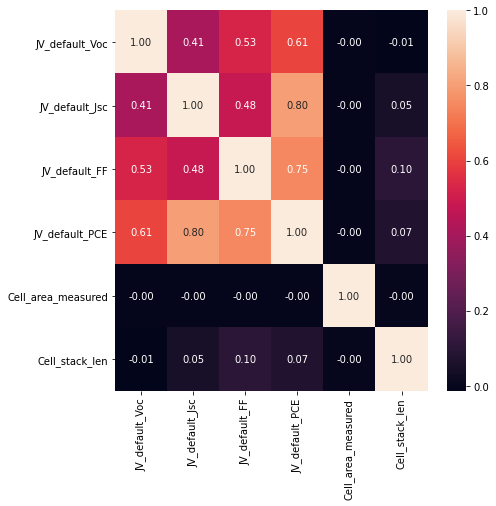

In [30]:
plt.figure(figsize=(7, 7))
sns.heatmap(sub_df[y_list + ['Cell_area_measured', 'Cell_stack_len']].corr(), annot=True, fmt='.2f')
plt.show()

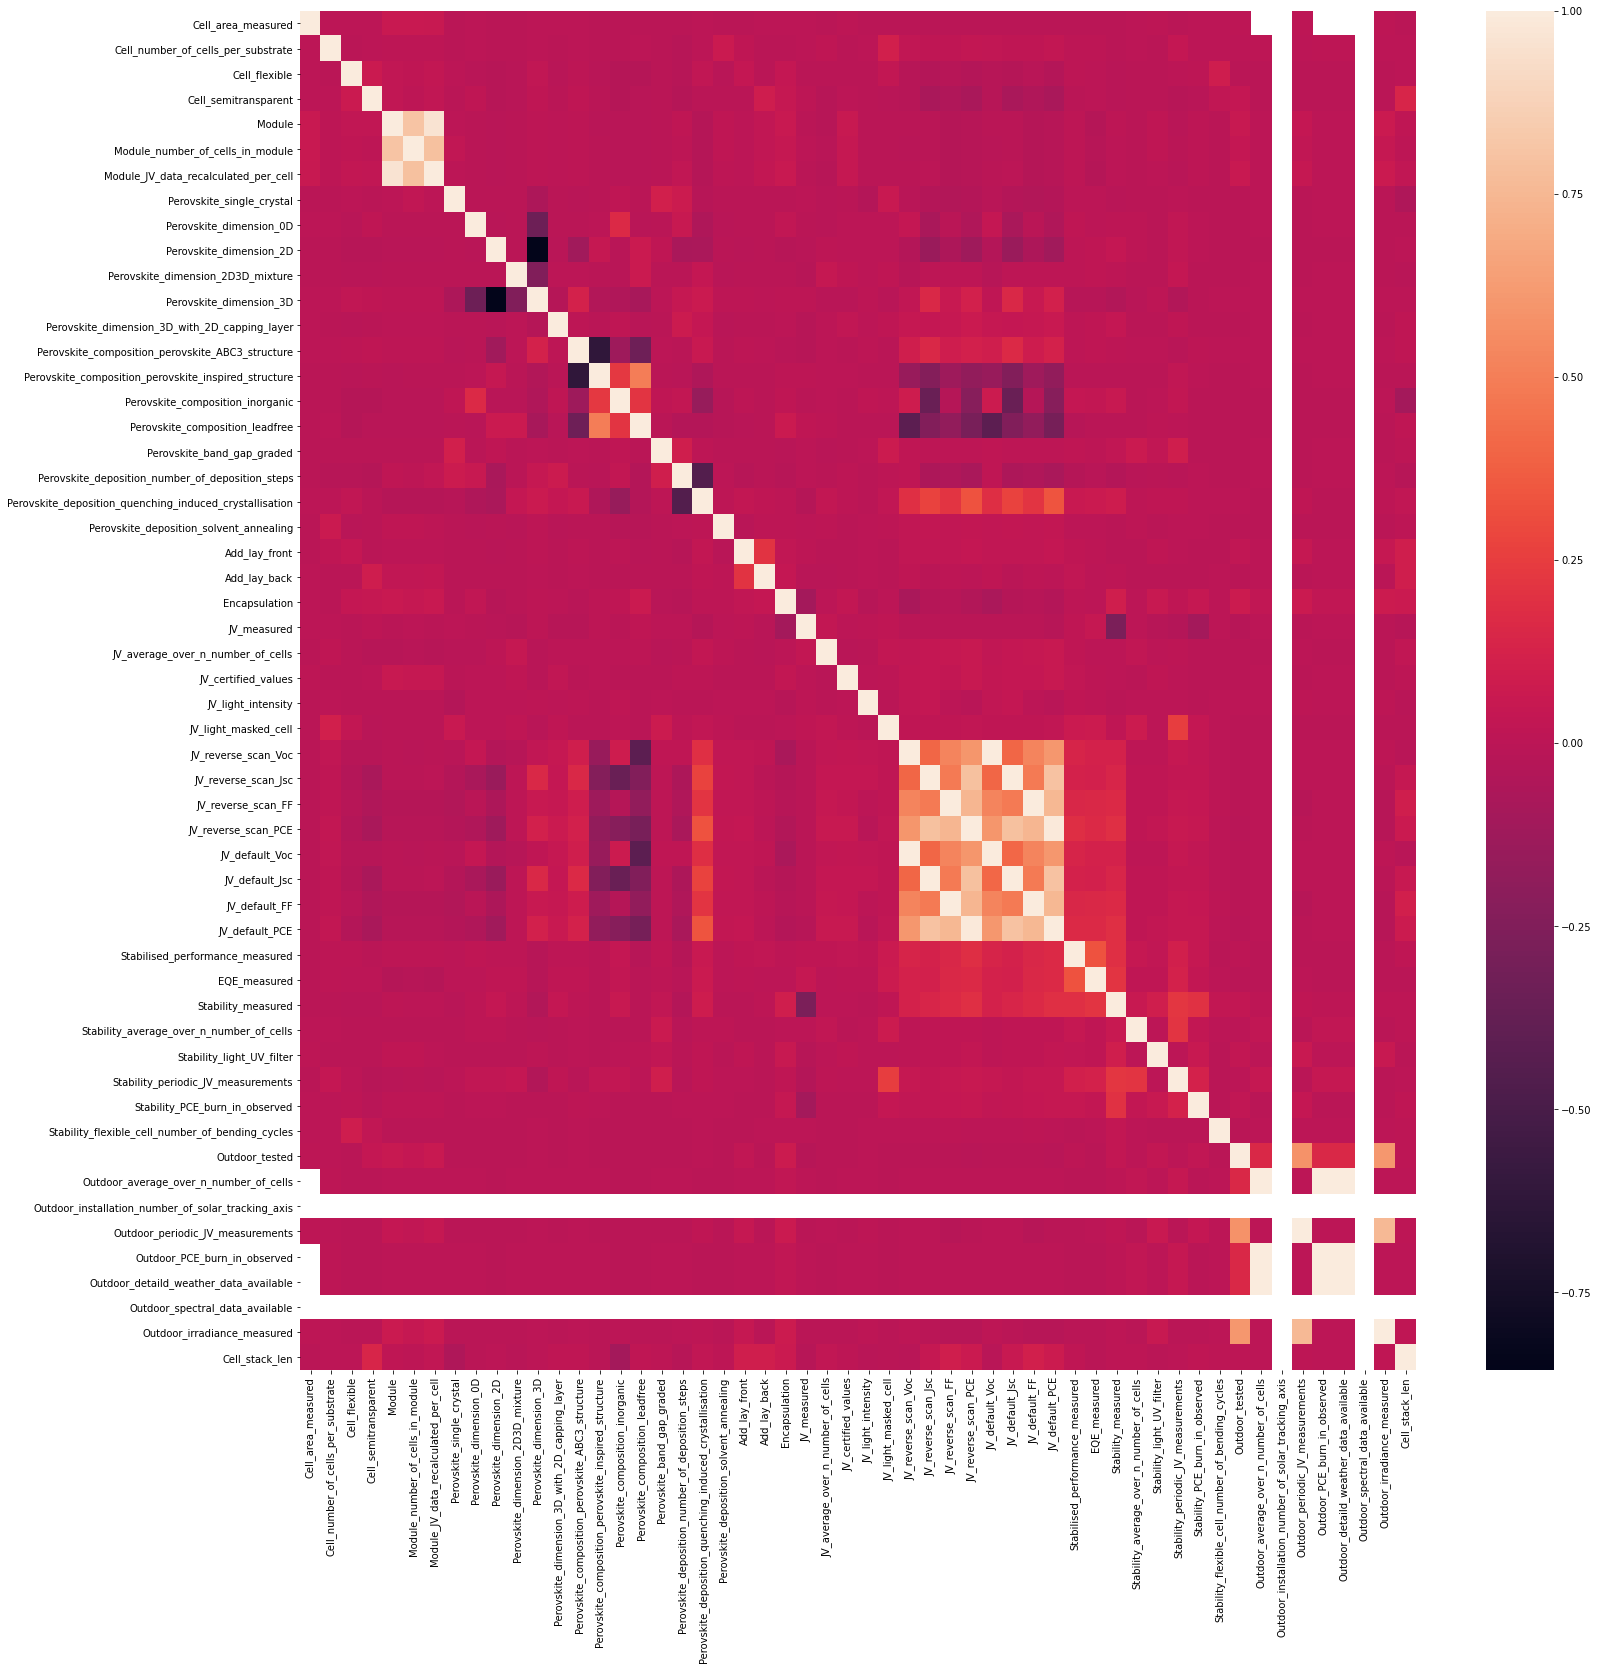

In [31]:
plt.figure(figsize=(25, 25))
sns.heatmap(sub_df.corr())
plt.show()

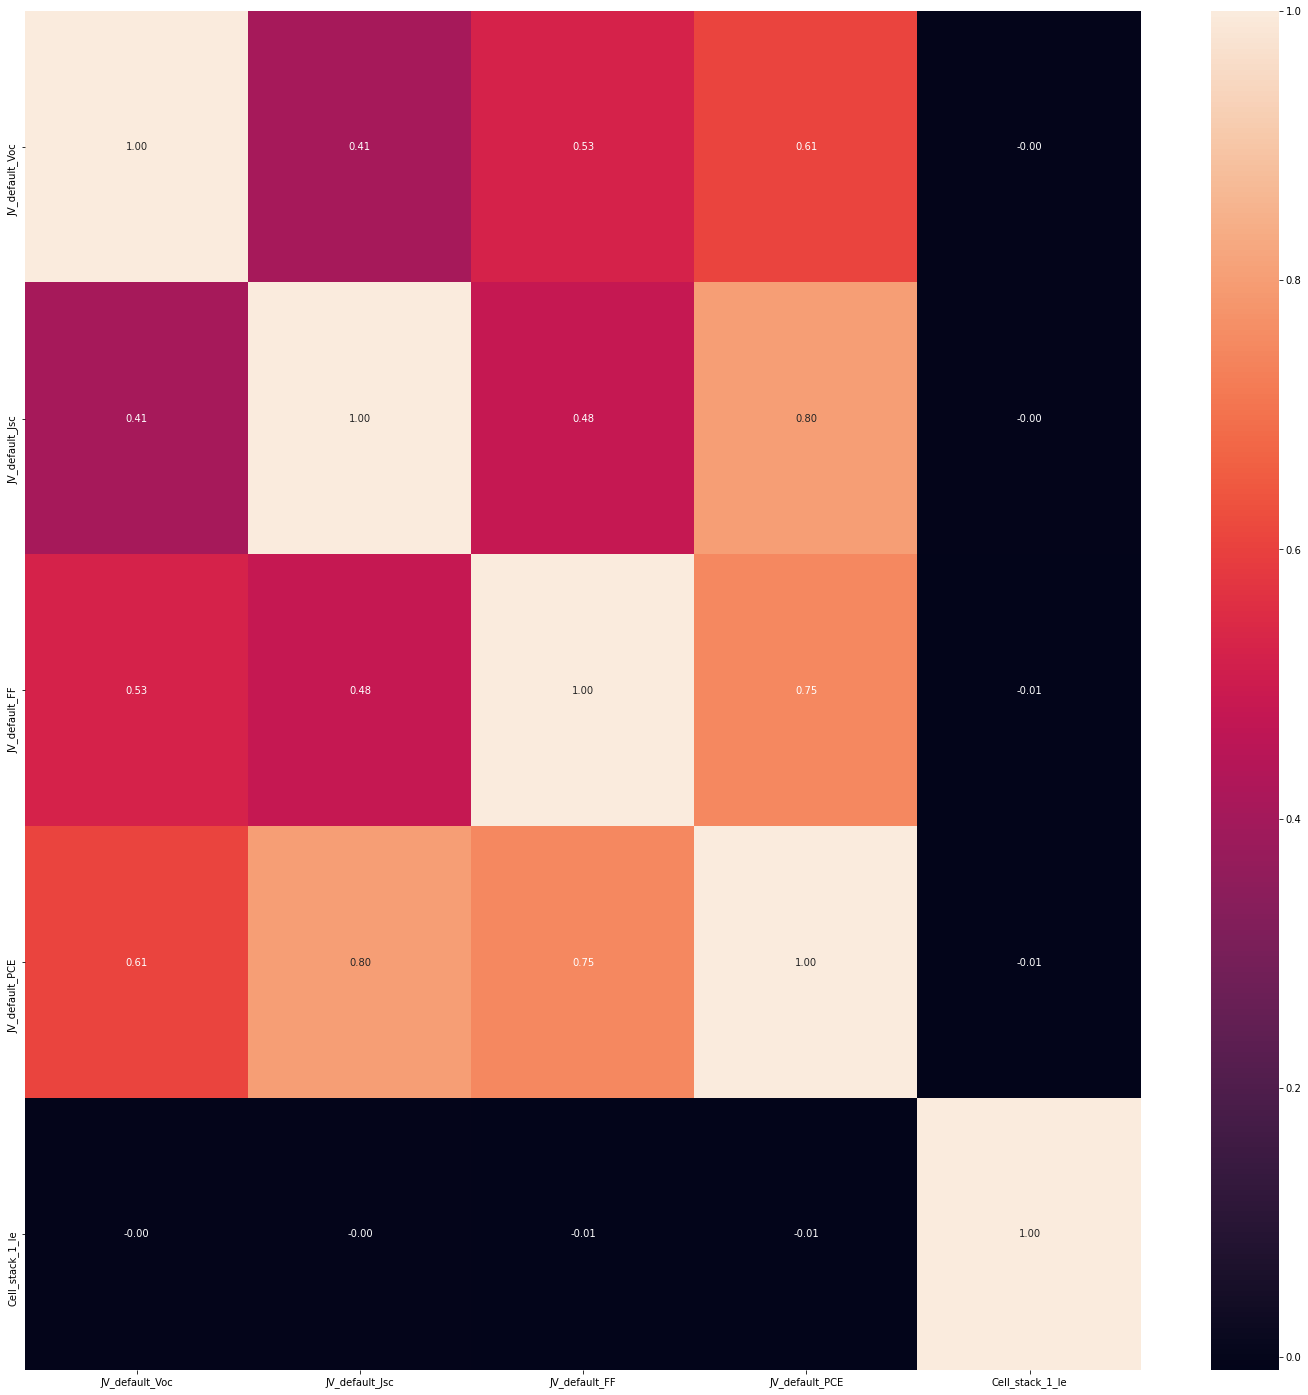

In [32]:
#pd.get_dummies(data = sub_df, columns = ['Cell_stack_1'])
'''
plt.figure(figsize=(25, 25))
sns.heatmap(pd.concat([sub_df[y_list],
           pd.get_dummies(sub_df['Cell_stack_1'])]).corr())
plt.show()
'''

le = preprocessing.LabelEncoder()
sub_df['Cell_stack_1_le'] = le.fit_transform(sub_df['Cell_stack_1'])

plt.figure(figsize=(25, 25))
sns.heatmap(sub_df[y_list + ['Cell_stack_1_le']].corr(), annot=True, fmt='.2f')
plt.show()

----JV_default_PCE----
 1) Cell_area_measured             0.228178
 2) Perovskite_deposition_quenching_induced_crystallisation 0.184080
 3) Perovskite_composition_leadfree 0.125854
 4) JV_average_over_n_number_of_cells 0.102279
 5) Cell_stack_len                 0.079203
 6) Stability_measured             0.039300
 7) Perovskite_composition_inorganic 0.028476
 8) Perovskite_deposition_number_of_deposition_steps 0.027251
 9) Stabilised_performance_measured 0.025225
10) EQE_measured                   0.022117
11) JV_light_intensity             0.018943
12) Encapsulation                  0.014603
13) Perovskite_dimension_3D        0.013356
14) Cell_semitransparent           0.013094
15) JV_measured                    0.010783
16) Cell_flexible                  0.010274
17) Perovskite_deposition_solvent_annealing 0.009913
18) JV_light_masked_cell           0.009539
19) Perovskite_dimension_2D        0.005669
20) Perovskite_composition_perovskite_ABC3_structure 0.005635
21) Perovskite_dimen

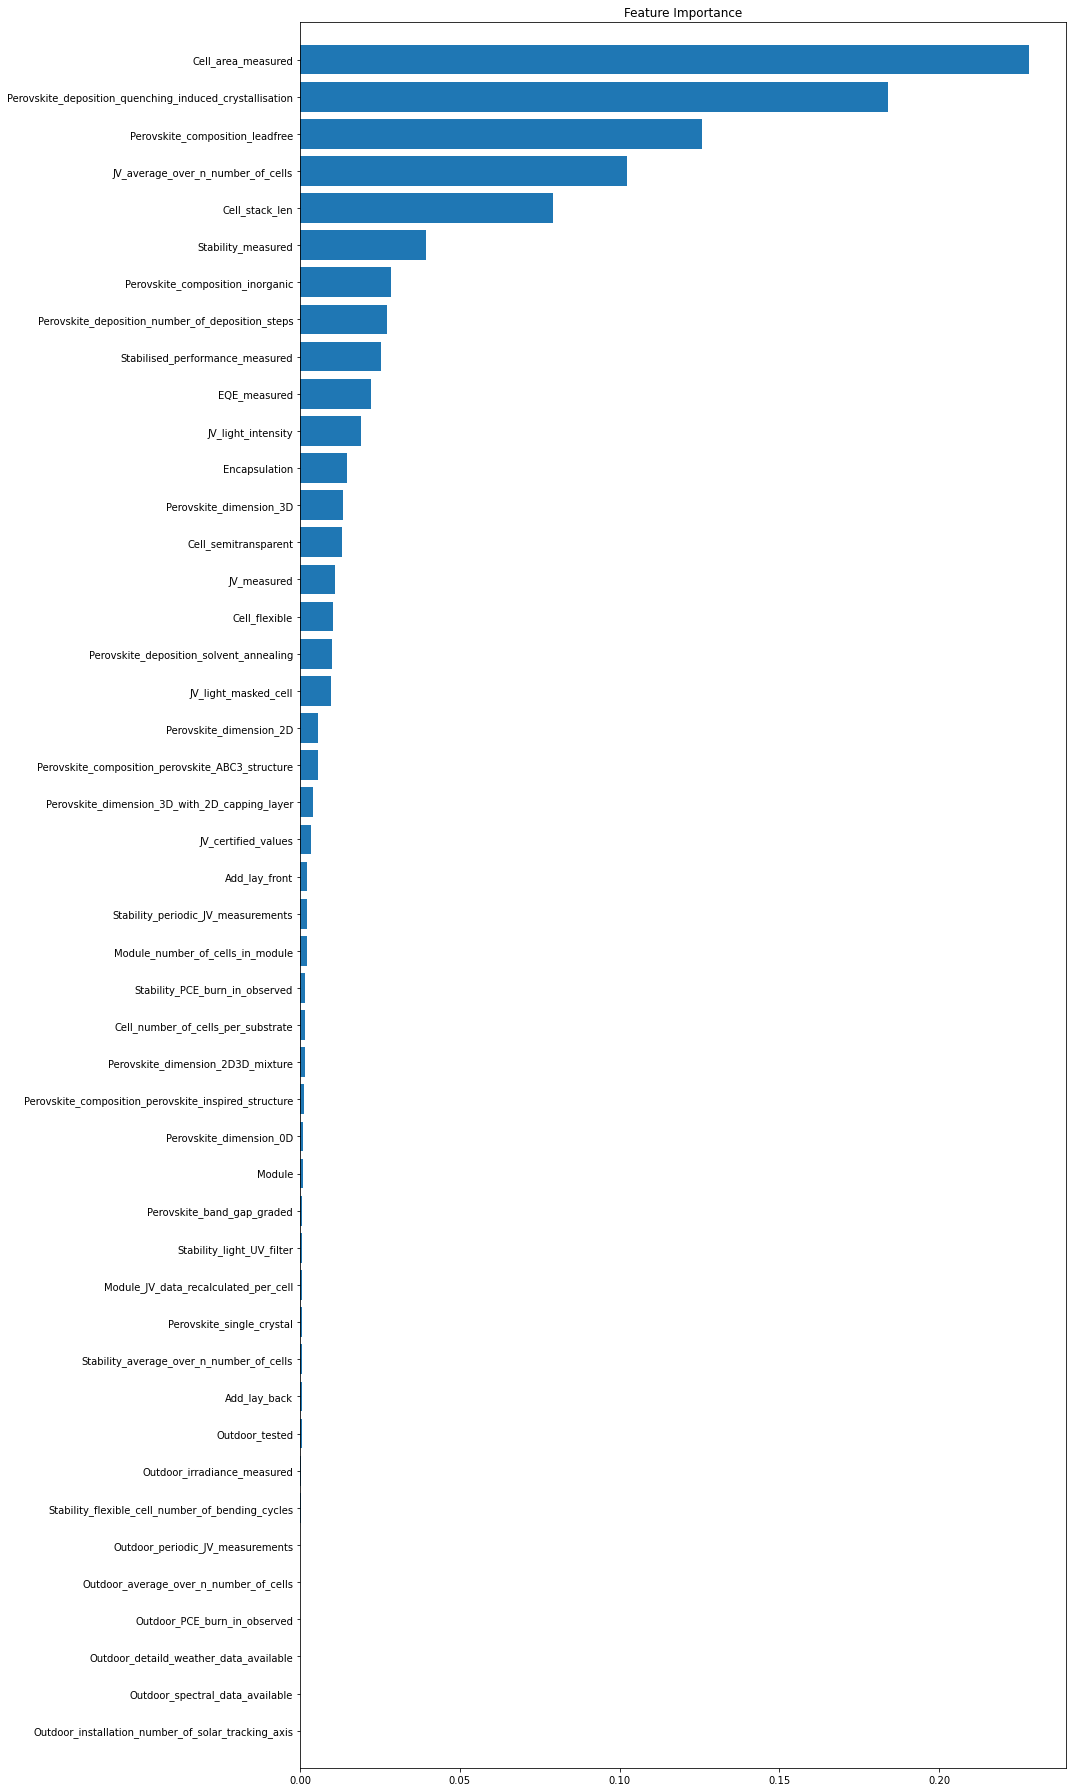

In [79]:
x_list = x_t.loc[:, [False if 'JV_reverse' in col else True for col in x_t.columns]
                 ].select_dtypes(include=['float64', 'int64', 'bool']).columns

for y_ in y_list[-1:]:
    print(f'----{y_}----')
    # X, y 데이터 분리
    X = sub_df.loc[:, x_list]
    X = X.apply(lambda x: x.fillna(x.mean()), axis=0).values
    y = sub_df.loc[:, y_]
    y = y.fillna(y.mean())

    # Train, Test 분리
    X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                        test_size=0.1,  # 데이터 수 적으므로 10%만
                                                        random_state=0)

    # 표준화 클래스
    stdsc = StandardScaler()
    X_train_std = stdsc.fit_transform(X_train)
    X_test_std = stdsc.transform(X_test)
    #X_train_std[:10], X_test_std[:10]
    
    TOP_N = X_train.shape[1]
    
    feat_labels = x_list
    forest = RandomForestRegressor(n_estimators=500,
                                   random_state=1)
    forest.fit(X_train_std, y_train)

    importances = forest.feature_importances_
    indices_rev = np.argsort(importances)[::-1]
    indices = np.argsort(importances)[::]
    # np.argsort(): 작은 값부터 순서대로 데이터의 index를 반환

    for f in range(TOP_N):
        print('%2d) %-*s %f' % (f + 1, 30,
                                feat_labels[indices_rev[f]],
                                importances[indices_rev[f]]))

    plt.figure(figsize=(15, 25))
    plt.title('Feature Importance')
    plt.barh(range(TOP_N),
             importances[indices],
             align='center')
    plt.yticks(range(TOP_N), labels=np.array(x_list)[indices])
    plt.ylim([-1, TOP_N])
    plt.tight_layout()
    plt.savefig('Feature Importance.png')
    plt.show()